### PetAdoption - Capstone Project 

The dataset used is available on Kraggle's PetFinder completion done in 2019 [link](https://www.kaggle.com/competitions/petfinder-adoption-prediction/overview).  

Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. If homes can be found for them, many precious lives can be saved — and more happy families created.

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

The goal of the competition was to develop an algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, it will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization.



### Understanding the Data
The dataset is seperated into train and test data(csv) files. In addition with main data files, additional files  
* BreedLabels
* StateLabels
* ColorsLabels

for descriptive names of the values in main dataset. 

Additional/Optional data files for  

1) Images
For pets that have photos, in the format of PetID-ImageNumber.jpg. 

2) Image Metadata
Images processed via Google's Vision API, providing analysis on Face Annotation, Label Annotation, Text Annotation and Image Properties. File name format is PetID-ImageNumber.json.

    Google's Vision API : https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate

3) Sentiment Data
Data for each pet profile's after running through Google's Natural Language API, is provided with analysis on sentiment and key entities. 
File name format is PetID.json.

    Google Natural Language API reference: https://cloud.google.com/natural-language/docs/basics


##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts

### Dataset files

Will read in 4 files
* Train Data - 'data2/train/train.csv'
* Test Data  - 'data2/test/test.csv'
* Breed Data - 'data2/BreedLabels.csv'
* Color Data - 'data2/StateLabels.csv'



In [5]:
!pip install --upgrade scikit-learn
!pip install scikit-plot
!pip install category_encoders

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_score, recall_score, accuracy_score, make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel,RFE, RFECV
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, make_column_selector, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.metrics import mean_squared_error, get_scorer_names
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
#from category_encoders import TargetEncoder
from sklearn.preprocessing import TargetEncoder

import warnings
warnings.filterwarnings('ignore')
#!pip install category_encoders
import scikitplot as skplt
import common_fn as cf


In [7]:
# Global config object

config = cf.Config()
config.globalloglevel = 0

# Pandas options for display
pd.reset_option('display.max_columns')
pd.set_option('display.max_columns', None)

In [8]:
#For running on Google Colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True) # Mount Google Drive to access files
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/module17/data/bank-additional-full.csv', sep = ';')


In [9]:
#Read in Pets data and test file
pets_file =  'data2/train/train.csv'
pets_test_file =  'data2/test/test.csv'
pets_df = pd.read_csv(pets_file)
pets_test_df = pd.read_csv(pets_test_file)

In [10]:
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [11]:
pets_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [12]:
# Load the Breeds Labels
breeds_df = pd.read_csv('data2/BreedLabels.csv')
breeds_df.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [13]:
breeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BreedID    307 non-null    int64 
 1   Type       307 non-null    int64 
 2   BreedName  307 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [14]:
# Load the StateLabels
states_df = pd.read_csv('data2/StateLabels.csv')
states_df.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [15]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StateID    15 non-null     int64 
 1   StateName  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [16]:
# Load the Color Labels
colors_df = pd.read_csv('data2/ColorLabels.csv')
colors_df

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


### Understanding the Train Data Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
PetID - Unique hash ID of pet profile
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.
AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
0 - Pet was adopted on the same day as it was listed.
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


In [18]:
# Lets look at the null/NaN's in data

cf.feature_null_percentage_in_data(pets_df)

Type             0.00
Name             8.44
Age              0.00
Breed1           0.00
Breed2           0.00
Gender           0.00
Color1           0.00
Color2           0.00
Color3           0.00
MaturitySize     0.00
FurLength        0.00
Vaccinated       0.00
Dewormed         0.00
Sterilized       0.00
Health           0.00
Quantity         0.00
Fee              0.00
State            0.00
RescuerID        0.00
VideoAmt         0.00
Description      0.09
PetID            0.00
PhotoAmt         0.00
AdoptionSpeed    0.00
dtype: float64


Only missing data is in feature
* Name - 8%
* Description - <1 %

### Feature Analysis of Train Data

#### Feature: Name
Name is a such a unique feature and will have too much variance and could be any easy target for dropping, but before we do that, lets see are pets getting adopted who have null/no names. We see that there are 8+% of pets who do not have any name. Lets do some evaluation of pets with name and null names.

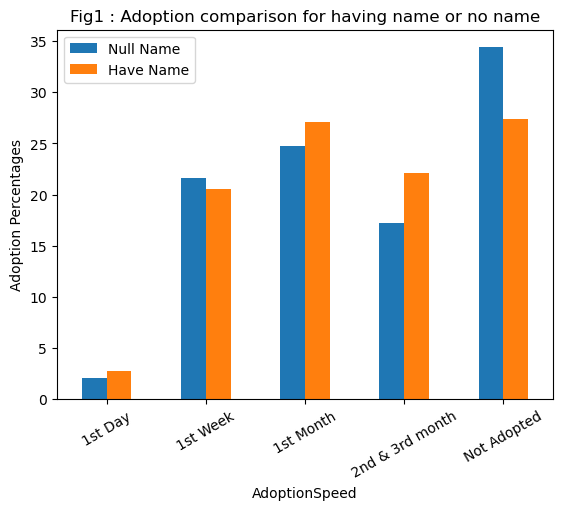

In [21]:
pet_name_df = pd.DataFrame()
pet_name_df['Null Name'] = pets_df[pets_df.Name.isnull()]['AdoptionSpeed'].value_counts(normalize=True)*100
pet_name_df['Have Name'] = pets_df[pets_df.Name.notnull()]['AdoptionSpeed'].value_counts(normalize=True)*100
figtitle, _ = config.getFigTitle('Adoption comparison for having name or no name')
pet_name_df.index = pet_name_df.index.map(config.getAdoptionSpeed())
pet_name_df.reindex(config.getAdoptionSpeed().values()).plot(
    kind='bar', 
    title=figtitle, 
    rot=30, 
    ylabel='Adoption Percentages');

#### Observations
* Pretty clear that pets with name does help in adtoption.
* Almost 35% of pets who do have any name in the data, end up not getting adopted. Since including names as is will add to much variance, will create a new feature hasName with 1 having name and 0, with no/null name 

In [23]:
# Adding new feature 'hasName' and dropping 'Name'
pets_df['hasName'] = np.where(pets_df.Name.notnull(), 1, 0)
pets_test_df['hasName'] = np.where(pets_test_df.Name.notnull(), 1, 0)

#### Fetaure : Type
Type of animal (1 = Dog, 2 = Cat)

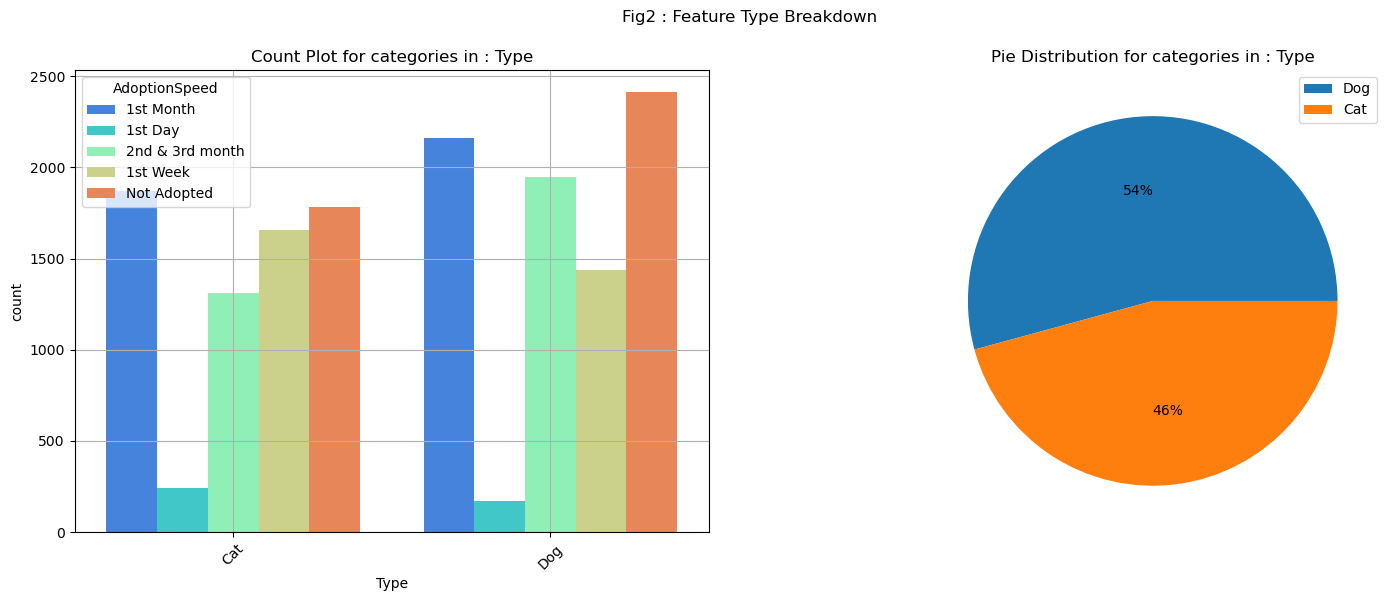

In [25]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Type'], 
                                   config.getTypeDict(), config.getTypeDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Type, tempdf.AdoptionSpeed, tempdf.Type, 'Type',  plot_all=False)

#### Observations
* The data includes a ratio of 54% - 46% infavor of Dogs to Cats
* Cats are adopted more on the first day and week compared to Dogs
* Dogs are adopted more after 1st month than cats
* More dogs than cats are not adopted after 4 months. 

#### Feature: MaturitySize
Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

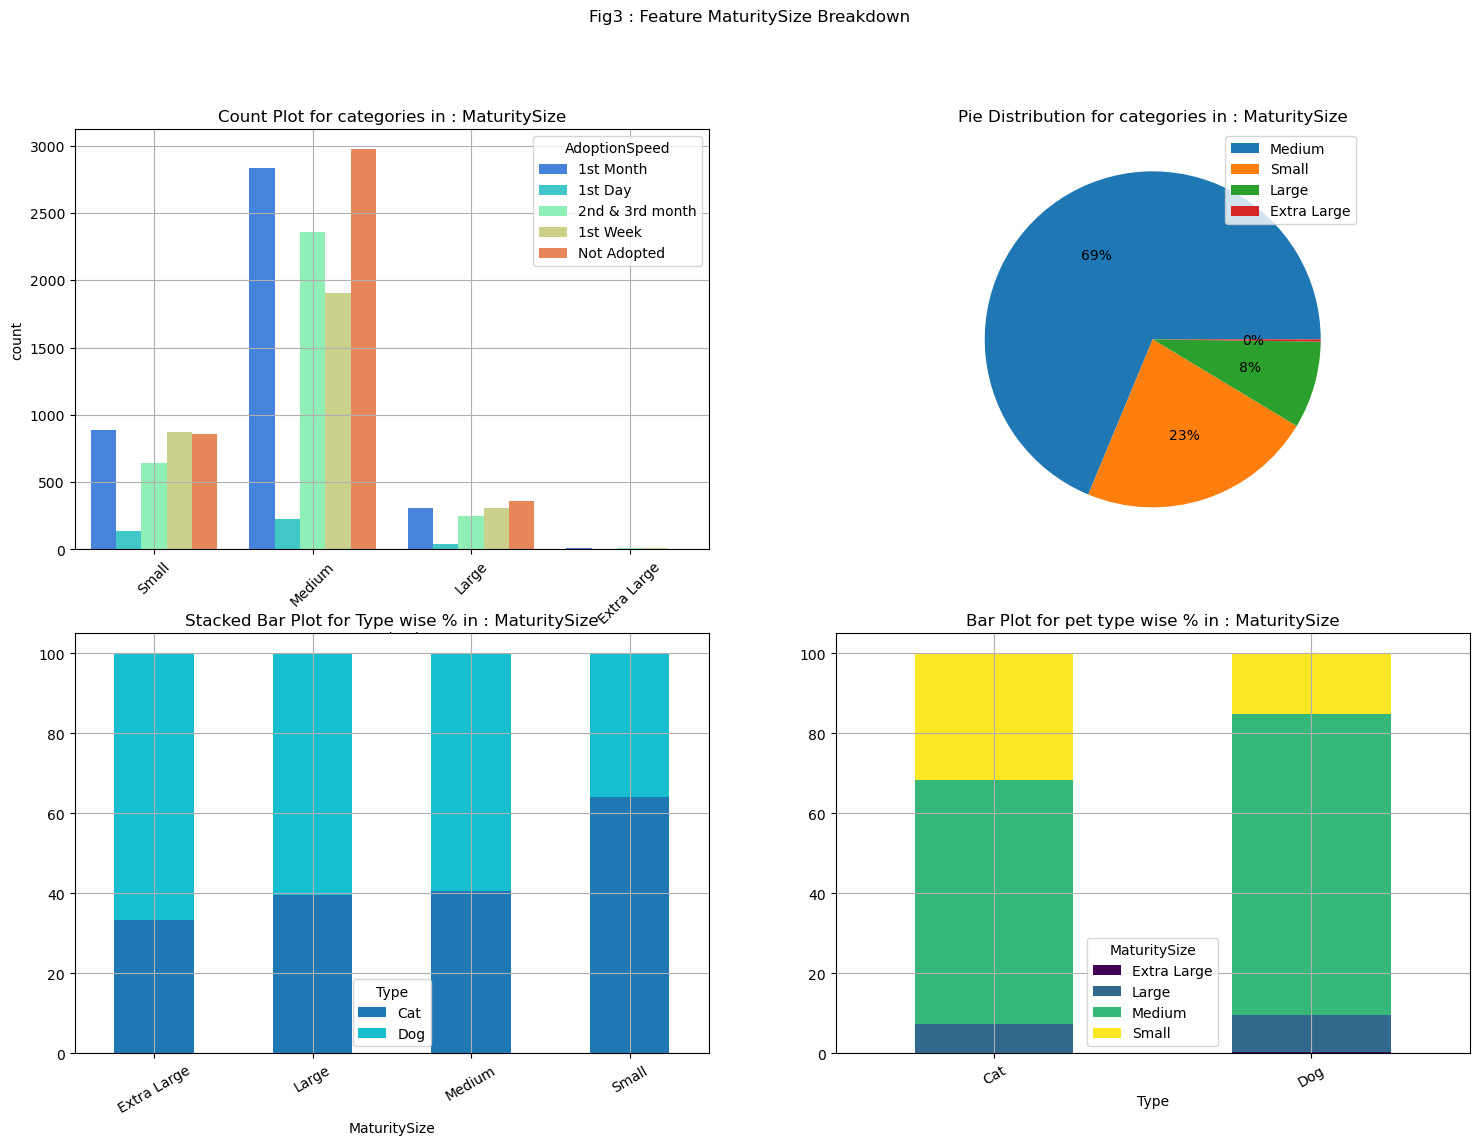

In [28]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['MaturitySize'], 
                                   config.getTypeDict(), config.getMaturityDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())

cf.generate_categorical_plots(tempdf, config, tempdf.MaturitySize, tempdf.AdoptionSpeed, tempdf.Type, 'MaturitySize')

#### Observations
* Pet parenet prefer to adopt
    * Medium sized pets.
    * Small sized pets
    * Extra large pets are the least preferred
* Medium sized pets are mostly adopted between 1 week - 3 months
* Pet parents prefer small cats to dogs(60 to 40 %)
* For all other size of pets, dogs are adopted over pets 60 - 40 % ratio 
       


#### Feature : FurLength
Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

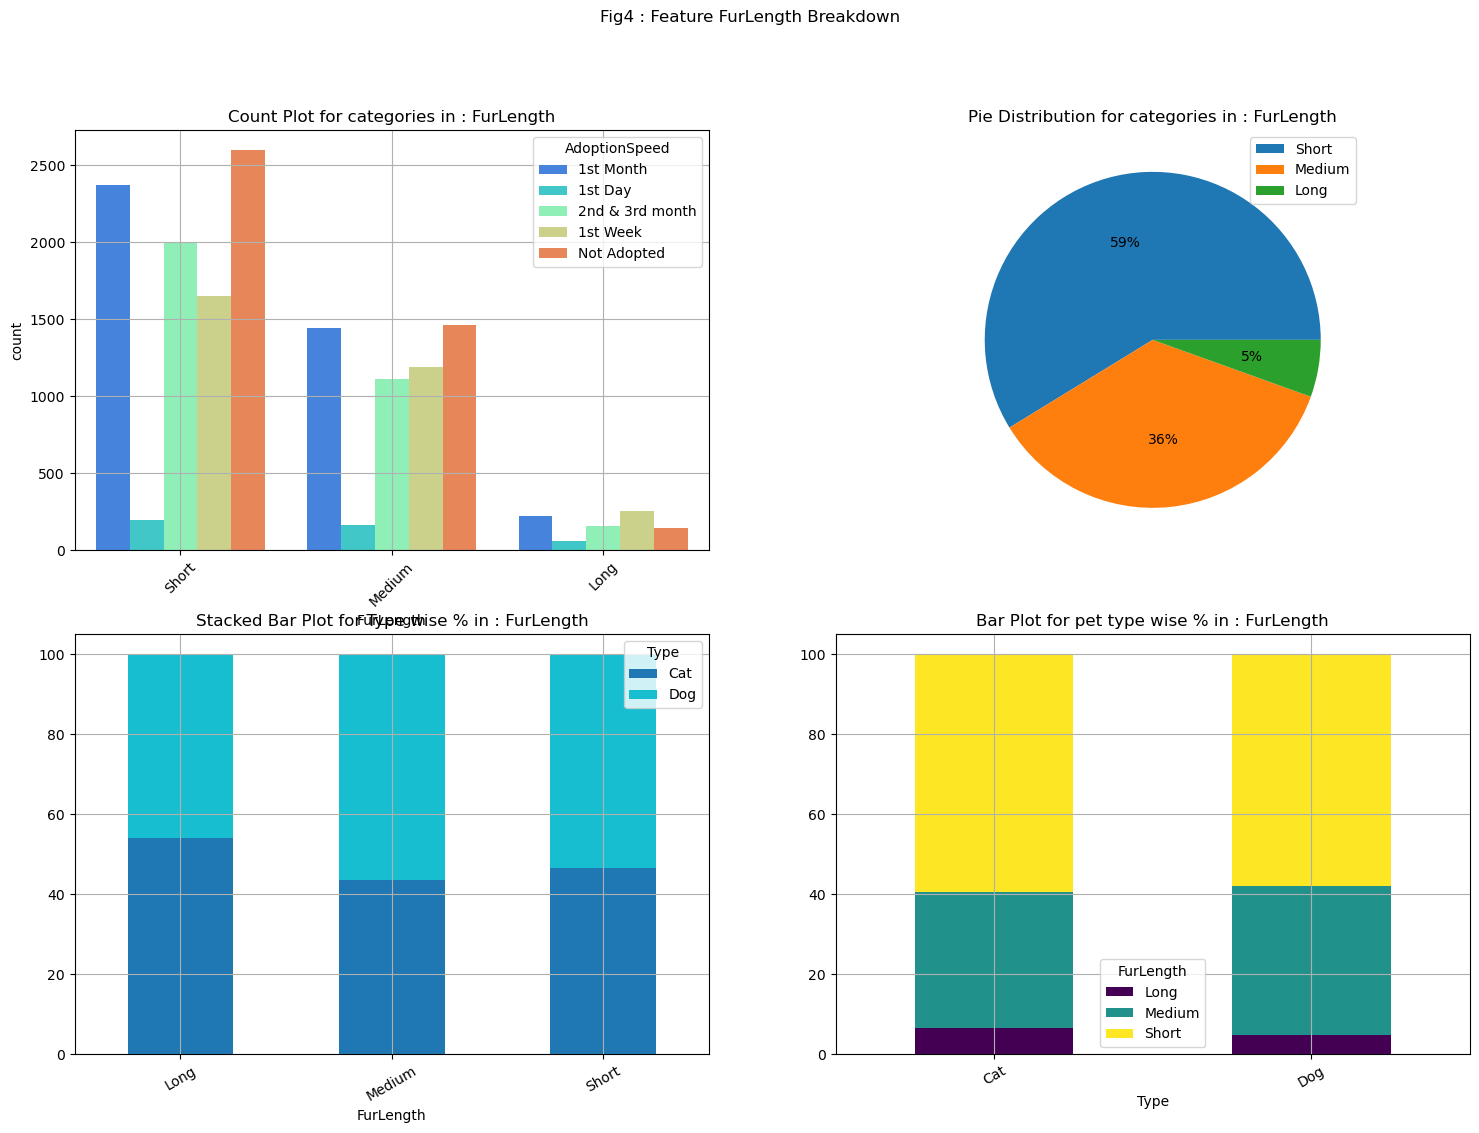

In [31]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['FurLength'], 
                                   config.getTypeDict(), config.getFurLenDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())

cf.generate_categorical_plots(tempdf, config, tempdf.FurLength, tempdf.AdoptionSpeed, tempdf.Type, 'FurLength')

#### Observations
* Pet parenet prefer furlength in following order 
    1) Short.
    2) Medium
    3) Large
* Dogs in general adopted slighly more than cats based on furlength
* Based on Pet type the ratio's of pets is very similar


#### Feature : Gender
Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

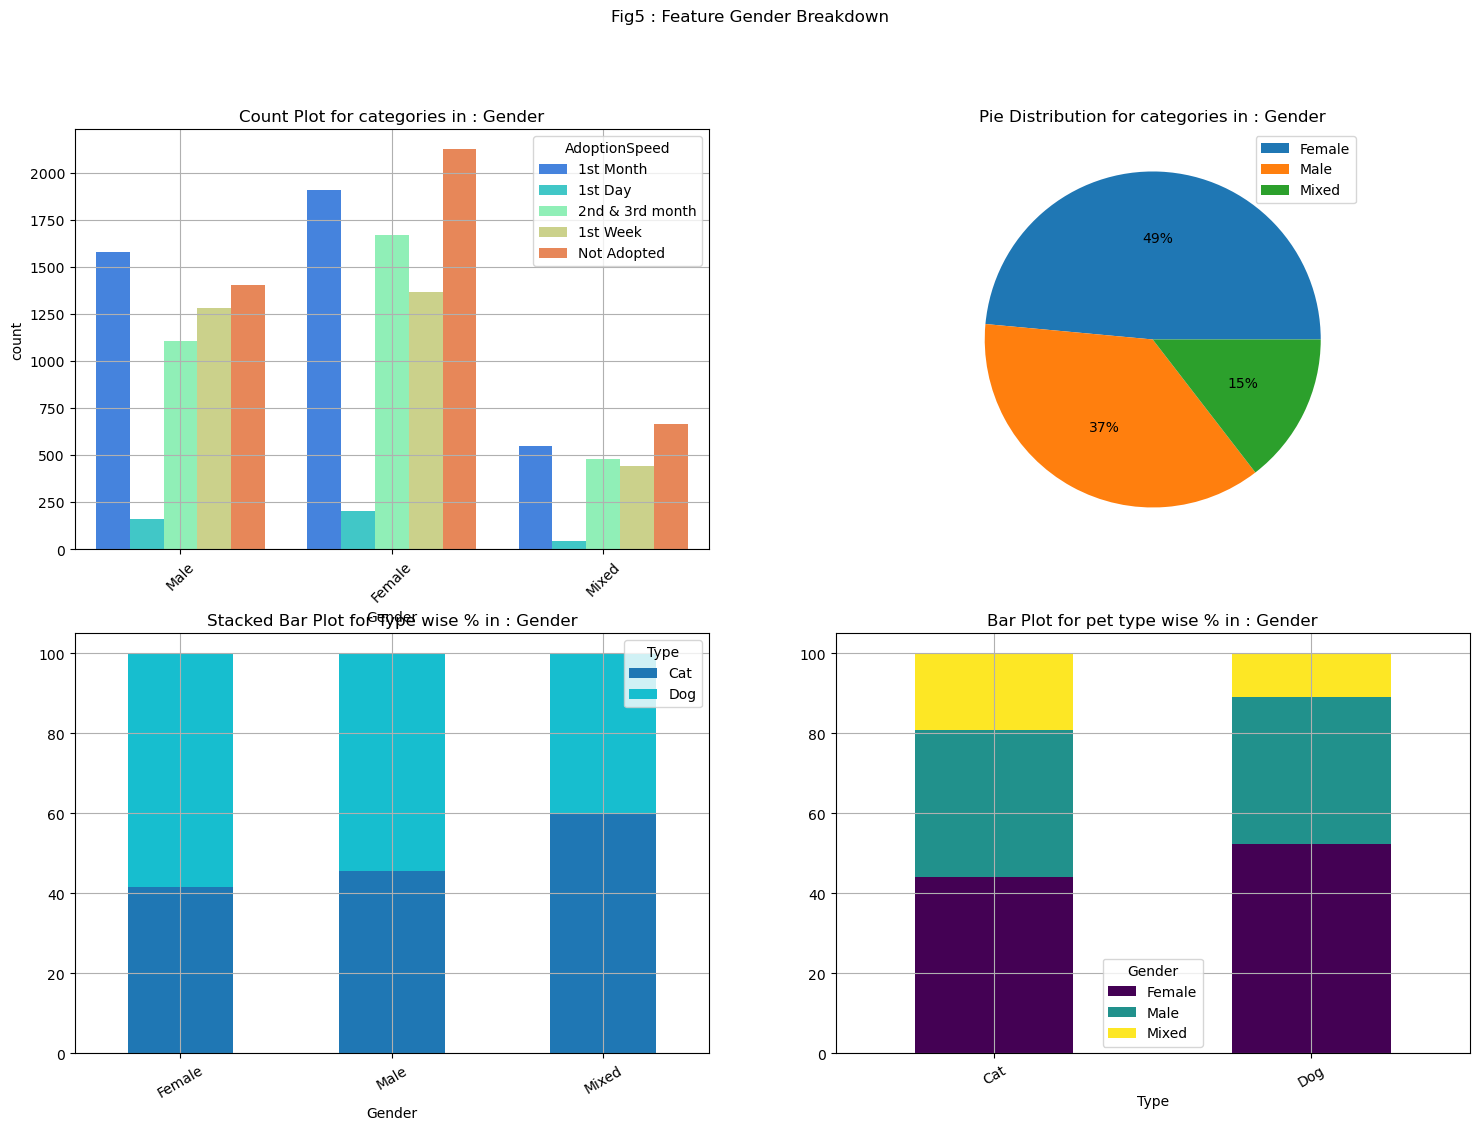

In [34]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Gender'], 
                                   config.getTypeDict(), config.getGenderDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Gender, tempdf.AdoptionSpeed, tempdf.Type, 'Gender')

#### Observation: 
* Females is the most popular gender among pets
* On the 1st day adotion, females lead the males pets
* Adoption wise femails are generally preferred over males
   

#### Feature : Health
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

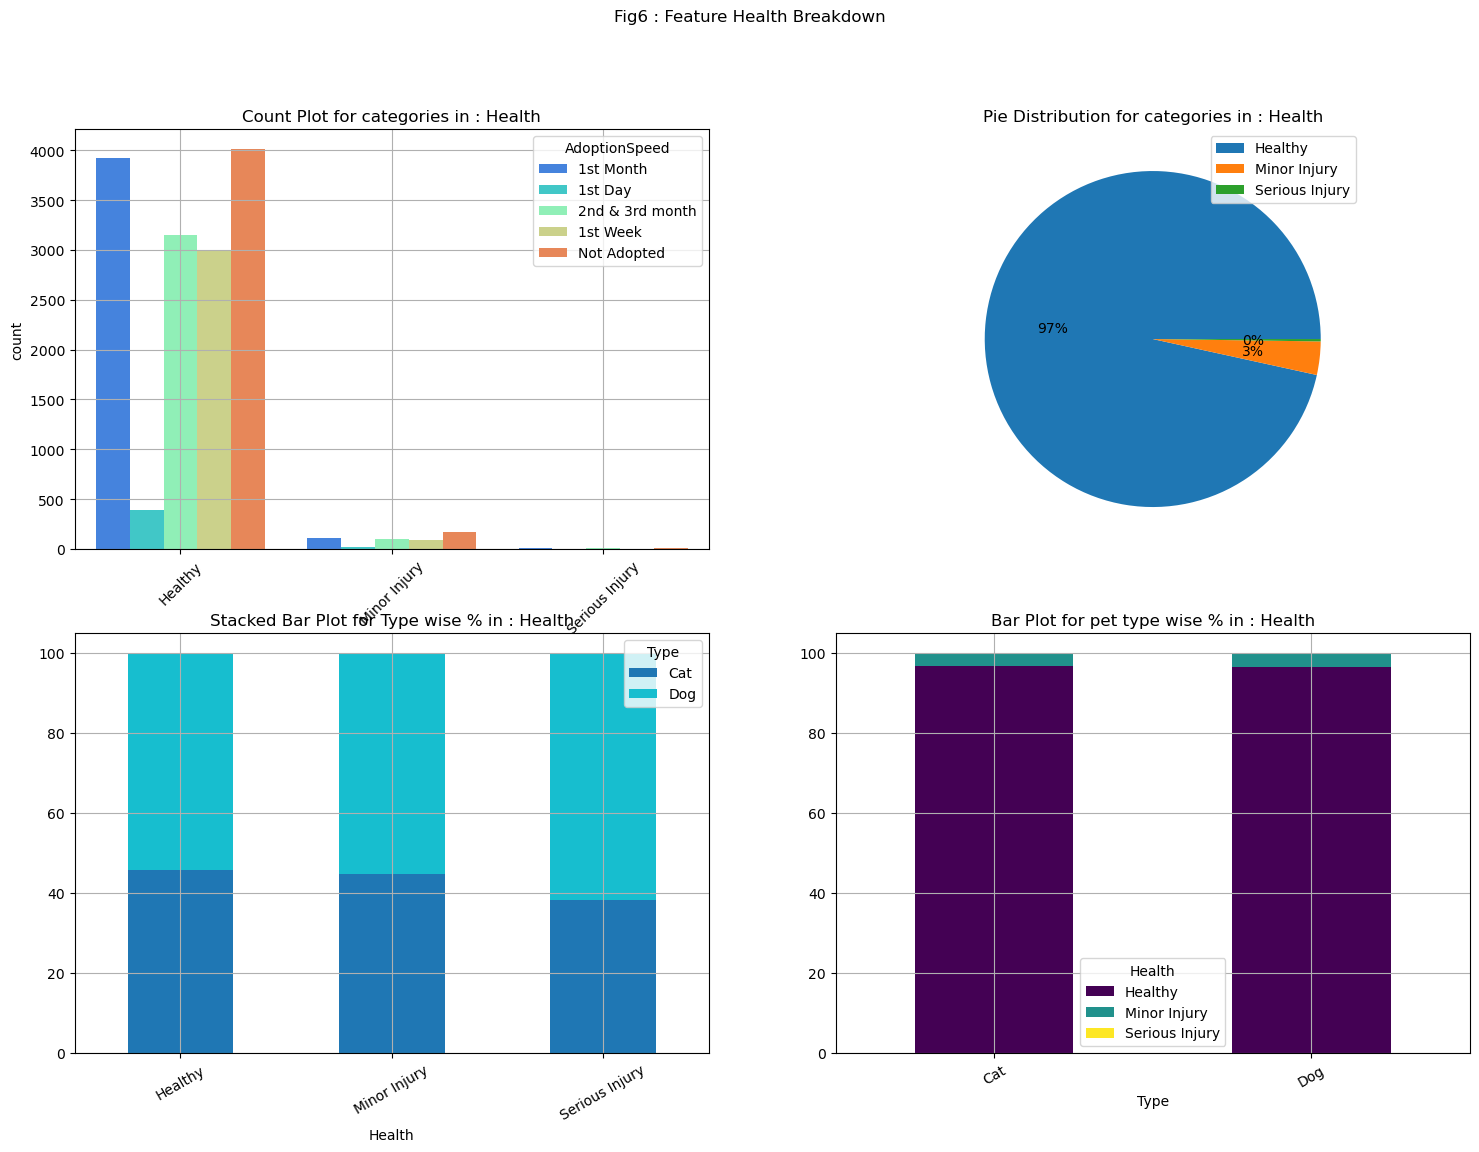

In [37]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Health'], 
                                   config.getTypeDict(), config.getHealthDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Health, tempdf.AdoptionSpeed, tempdf.Type, 'Health')

#### Observation
* Healthy Pets are generally preferred for Adoption.
* Most of the healthy pets are adopted within first month
* Among healthy pets dogs are 57% to 43% cats
  

#### Feature : Sterilized
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

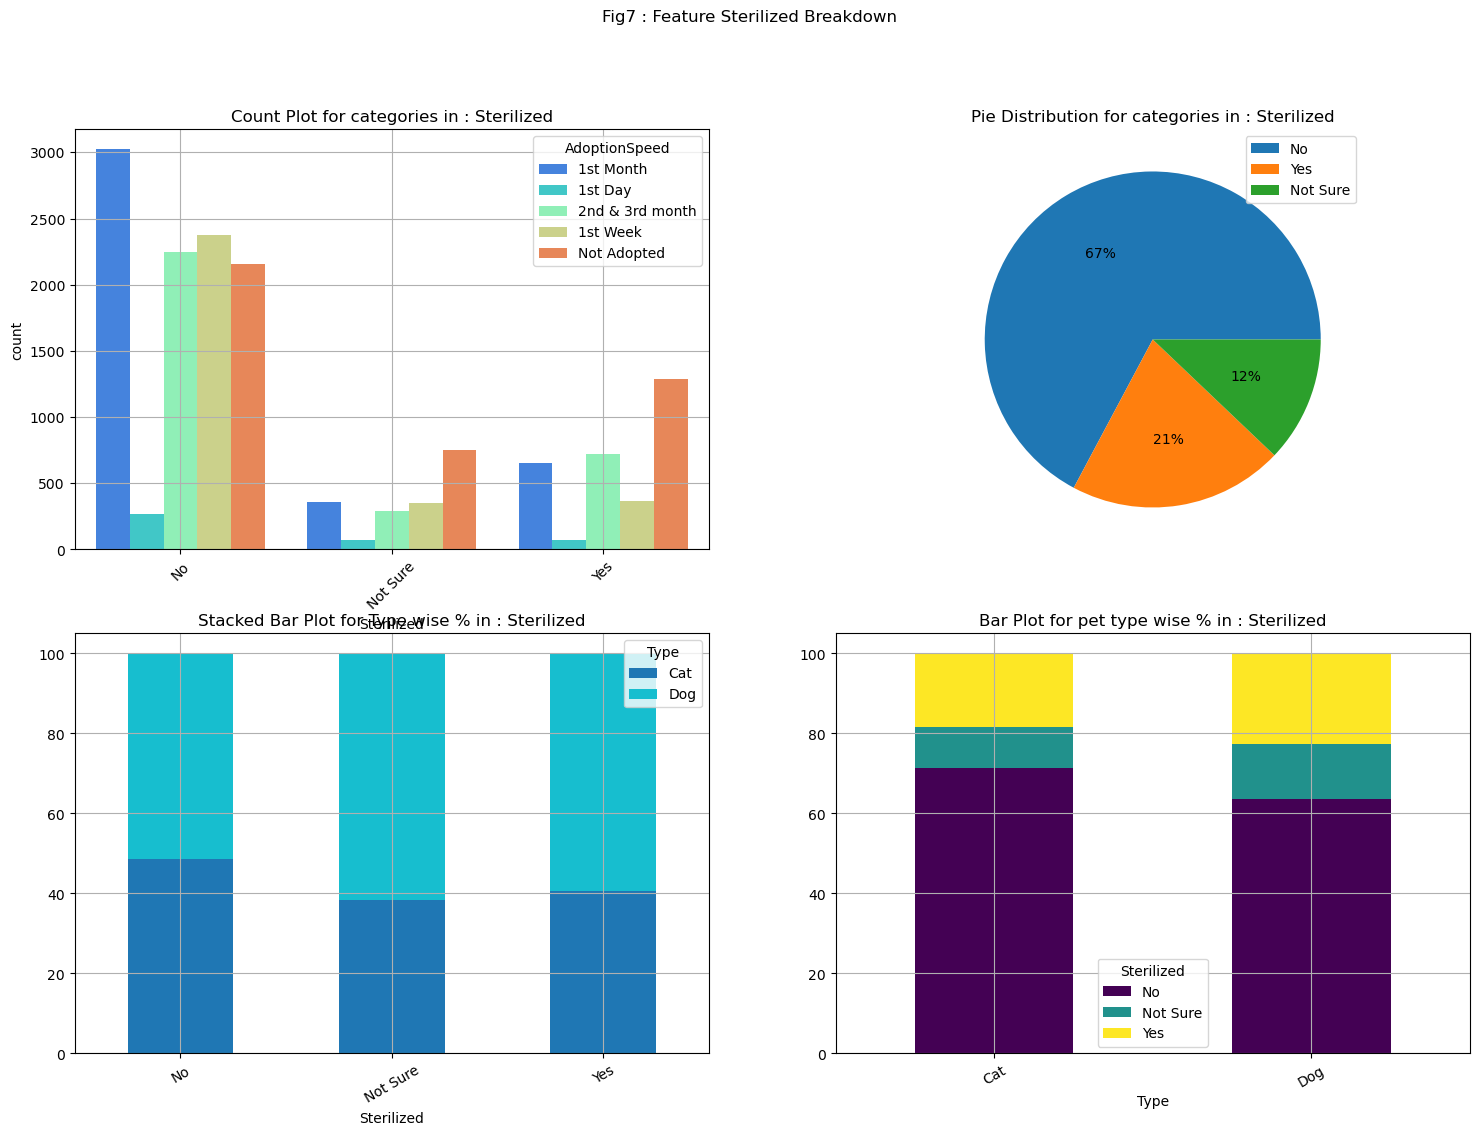

In [40]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Sterilized'], 
                                   config.getTypeDict(), config.getVaccinatedDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Sterilized, tempdf.AdoptionSpeed, tempdf.Type, 'Sterilized')

#### Observation 
* 67% of the pets are not spayed/neutered.
* Adoption seems not be dependent whether the pets are spayed/neutered
* Sterlization wise cats are not spayed when compared to dogs 


#### Feature : Vaccinated

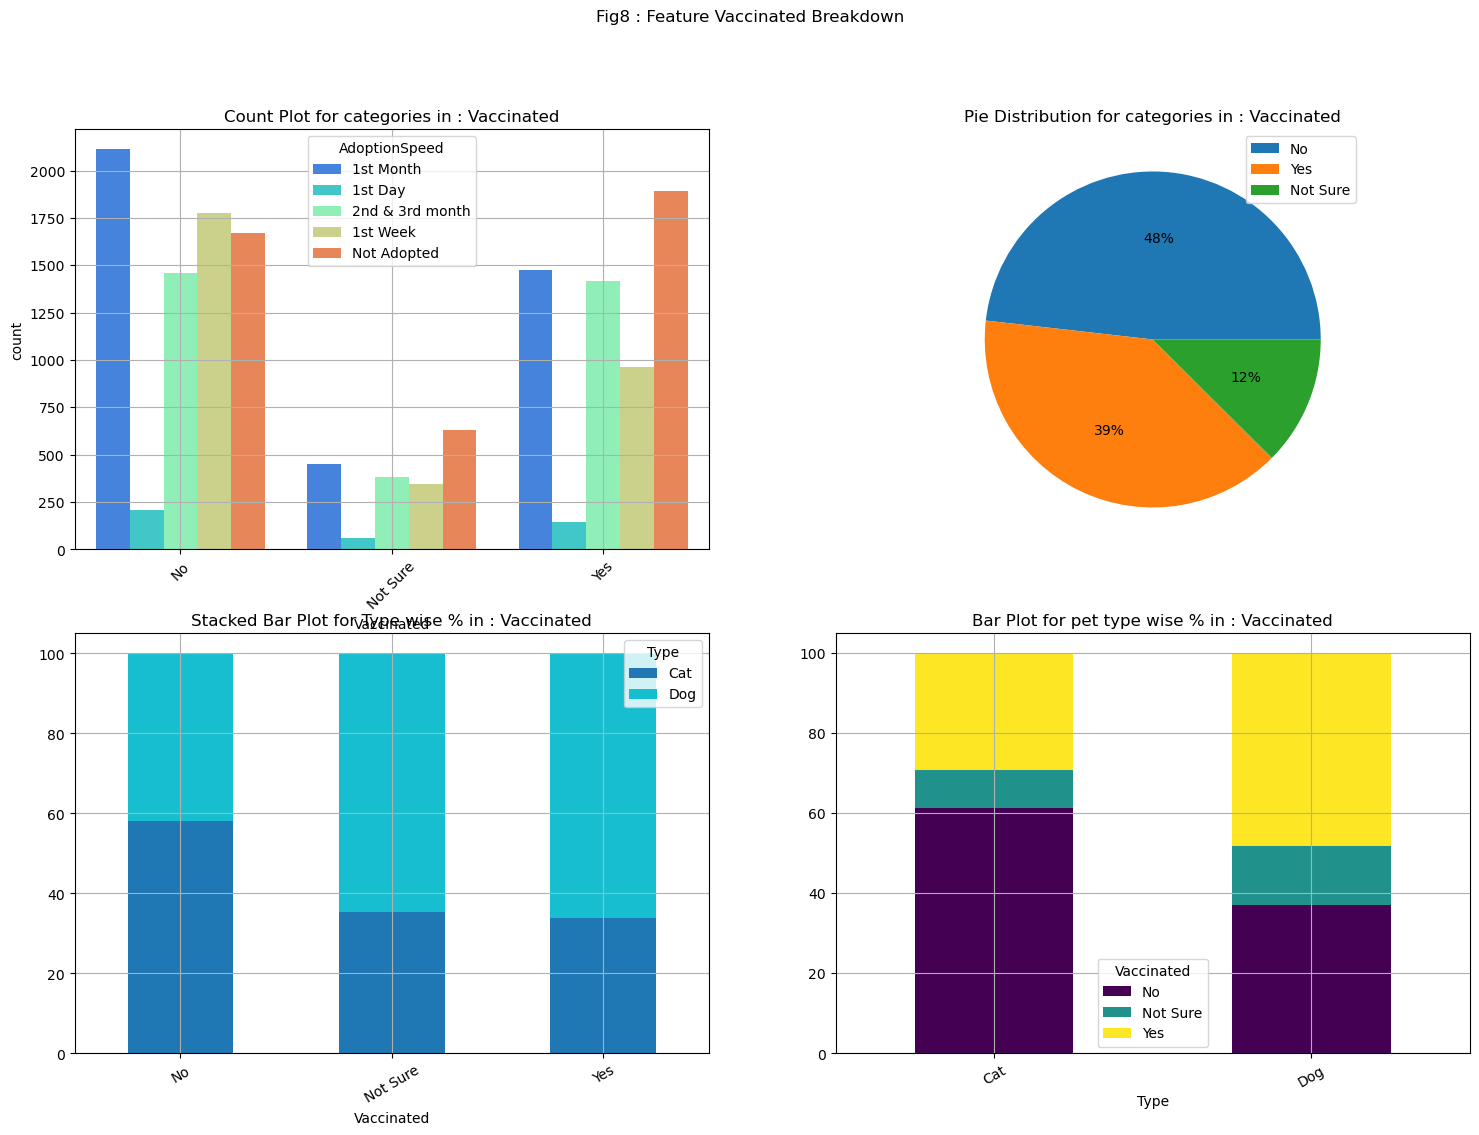

In [43]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Vaccinated'], 
                                   config.getTypeDict(), config.getVaccinatedDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Vaccinated, tempdf.AdoptionSpeed, tempdf.Type, 'Vaccinated')

#### Observation
* Adoption does seems to related whether pets are vaccinated or not.
* Dogs are more vaccinated when compared to Cars
  


#### Feature : Dewormed
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

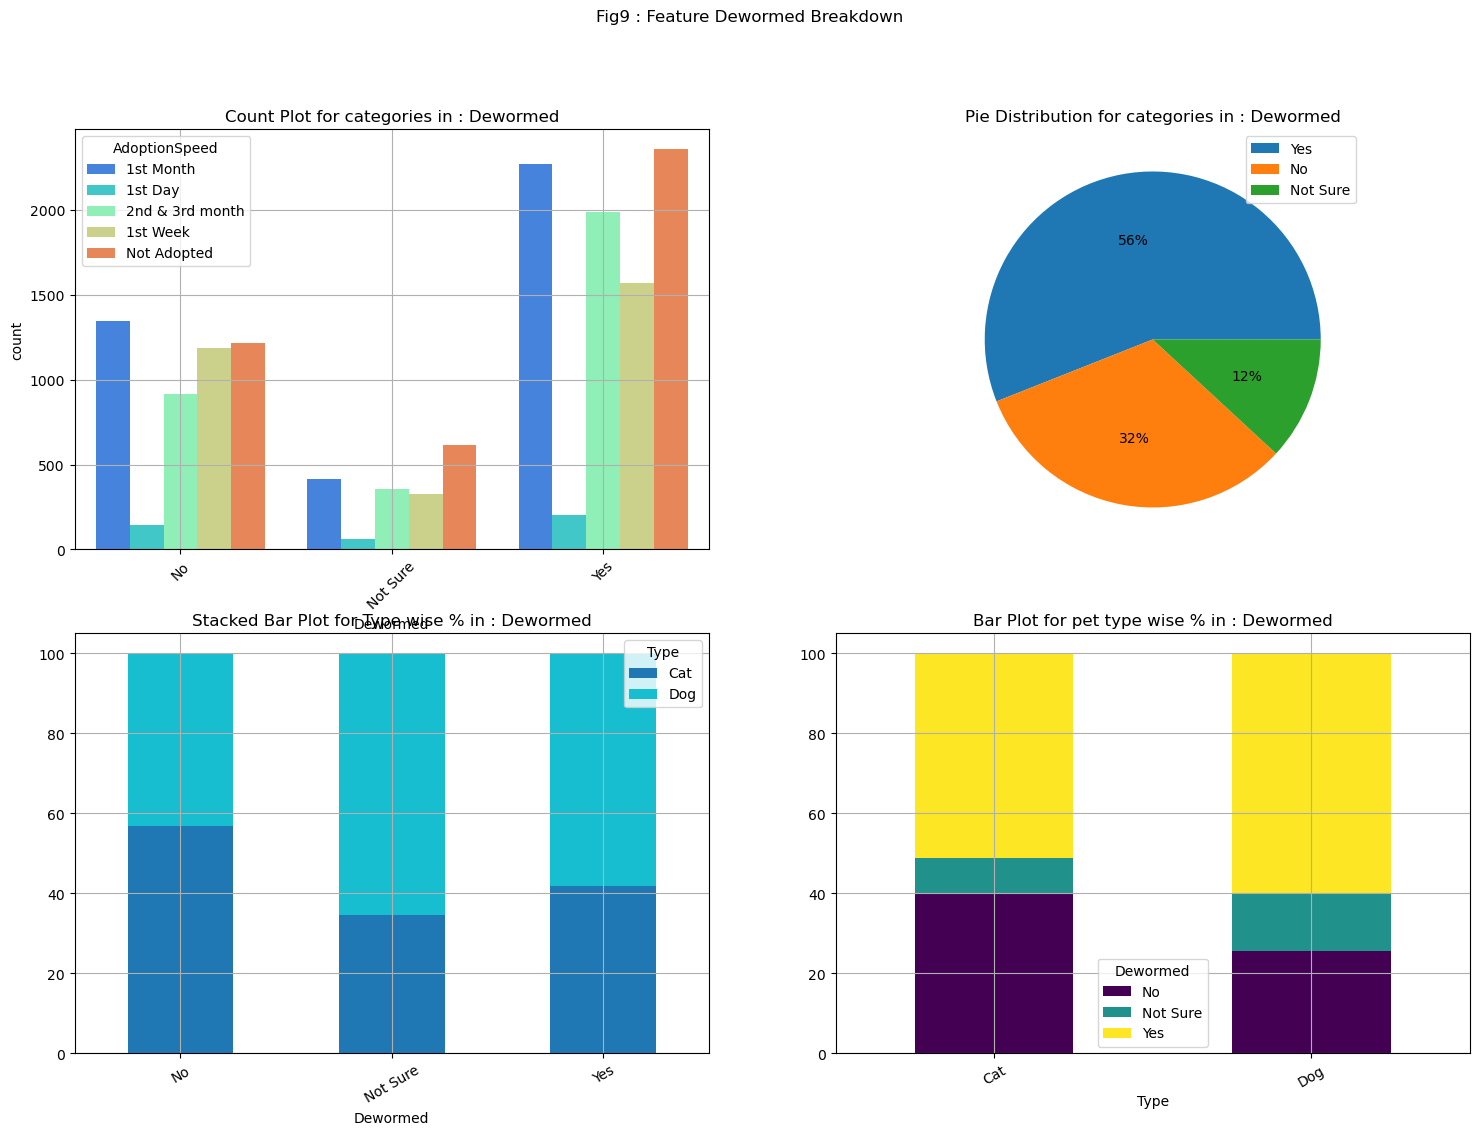

In [46]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['Dewormed'], 
                                   config.getTypeDict(), config.getVaccinatedDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Dewormed, tempdf.AdoptionSpeed, tempdf.Type, 'Dewormed')

#### Observtion
* Adoptions are higher if pets are dewormed.
* 60-40 is the ratio of dogs to cats which are dewormed 

#### Feature : Breed1


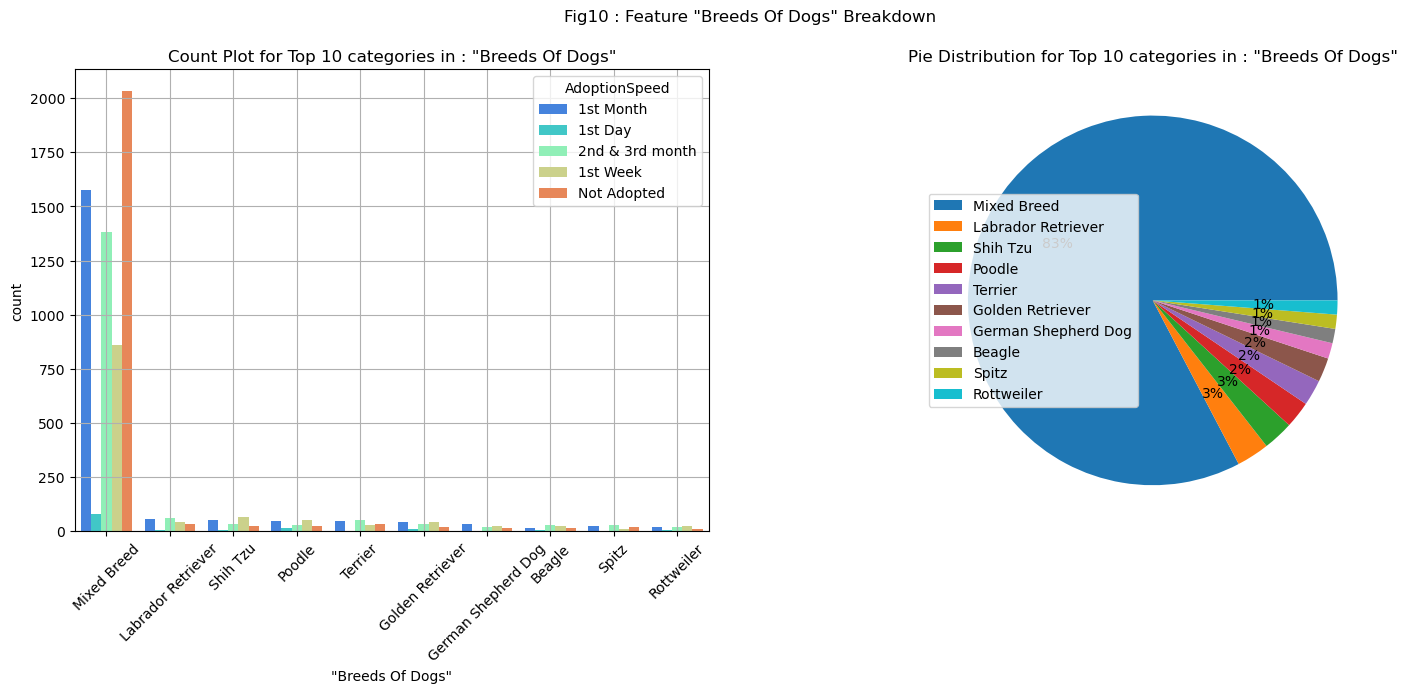

In [49]:
# Lets evaluate Dog Breeds ...

tempdf = cf.map_series_to_category(
        pets_df['Type'], pets_df['Breed1'], 
        config.getTypeDict(), 
        breeds_df[breeds_df['Type'] == 1].drop(columns='Type', axis=1).set_index('BreedID').to_dict().get("BreedName"),
        pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Breed1, tempdf.AdoptionSpeed, tempdf.Type, '"Breeds Of Dogs"', show_count=10, plot_all=False)


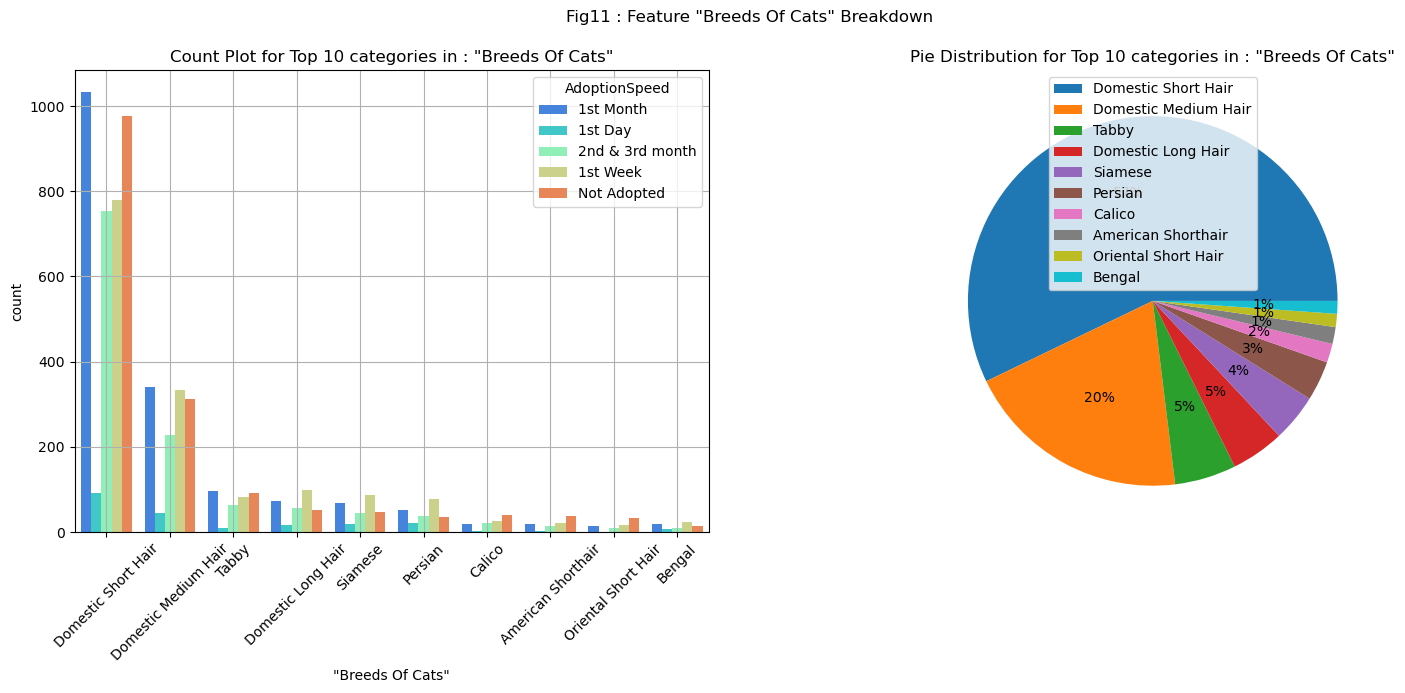

In [50]:
# Lets evaluate Cat Breeds ...

tempdf = cf.map_series_to_category(
        pets_df['Type'], pets_df['Breed1'], 
        config.getTypeDict(), 
        breeds_df[breeds_df['Type'] == 2].drop(columns='Type', axis=1).set_index('BreedID').to_dict().get("BreedName"),
        pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Breed1, tempdf.AdoptionSpeed, tempdf.Type, '"Breeds Of Cats"', show_count=10, plot_all=False)


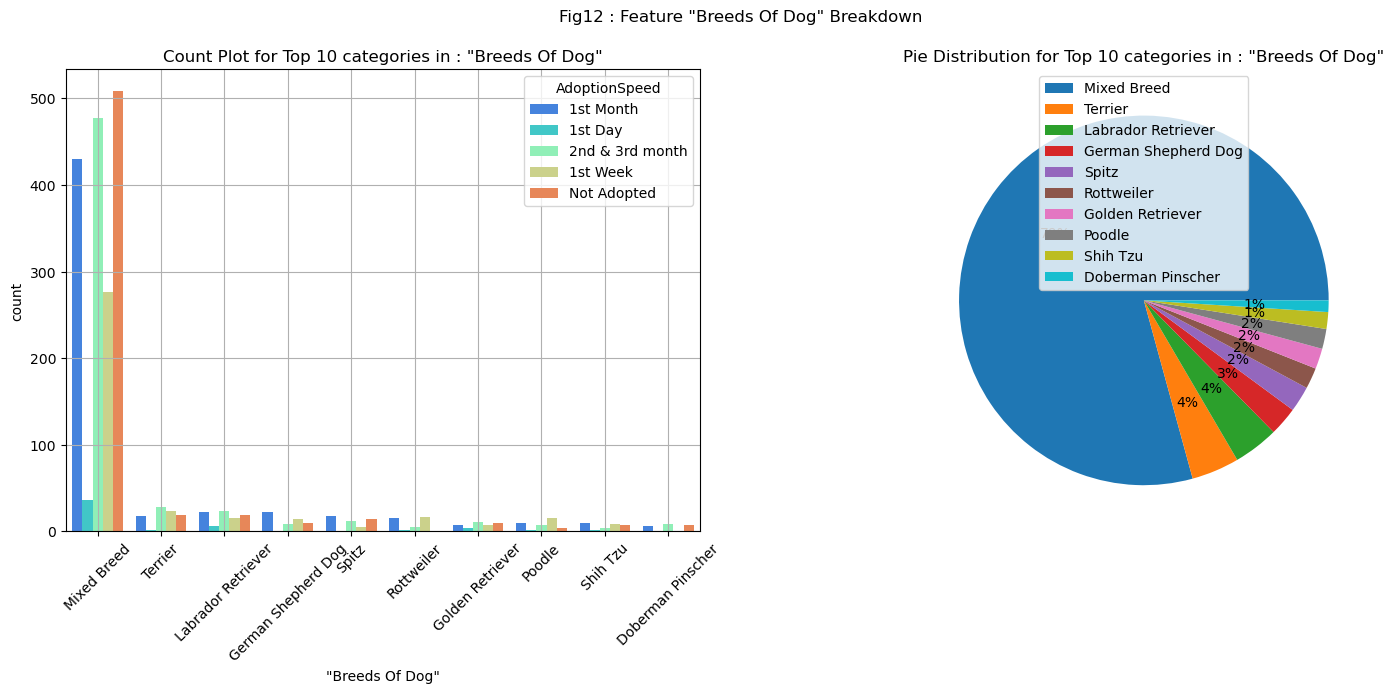

In [51]:
# Lets evaluate Cat Breeds ...

tempdf = cf.map_series_to_category(
        pets_df['Type'], pets_df['Breed2'], 
        config.getTypeDict(), 
        breeds_df[breeds_df['Type'] == 1].drop(columns='Type', axis=1).set_index('BreedID').to_dict().get("BreedName"),
        pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Breed2, tempdf.AdoptionSpeed, tempdf.Type, '"Breeds Of Dog"', show_count=10, plot_all=False)


#### Observations
* For Dogs -
    * More than 75% are mixed breed
* For Cats
    1) Domestic Short Haie is the most popular for adoption  
    2) Domestic Medium Hair is next poplar breed for cats  

### We are creating 2 features 
- purebred - Y for Pure breeds, N for Cross/Mix Breed, using Breed1, Breed2 ID
- singlecolor - Y for pure color, N for anothing mixed color using Color1, Color2, Color3

In [54]:
pets_df['purebred'] = pets_df.apply(lambda x: cf.isPureBreed(x.Type, x.Breed1, x.Breed2), axis=1)
pets_df['singlecolor'] = np.where(((pets_df.Color1 > 0) & (pets_df.Color2 == 0) & (pets_df.Color3 == 0)), 1, 0)

In [55]:
# Prepare test data set as well
pets_test_df['purebred'] = pets_test_df.apply(lambda x: cf.isPureBreed(x.Type, x.Breed1, x.Breed2), axis=1)
pets_test_df['singlecolor'] = np.where(((pets_test_df.Color1 > 0) & (pets_test_df.Color2 == 0) & (pets_test_df.Color3 == 0)), 1, 0)

#### Feature PureBred

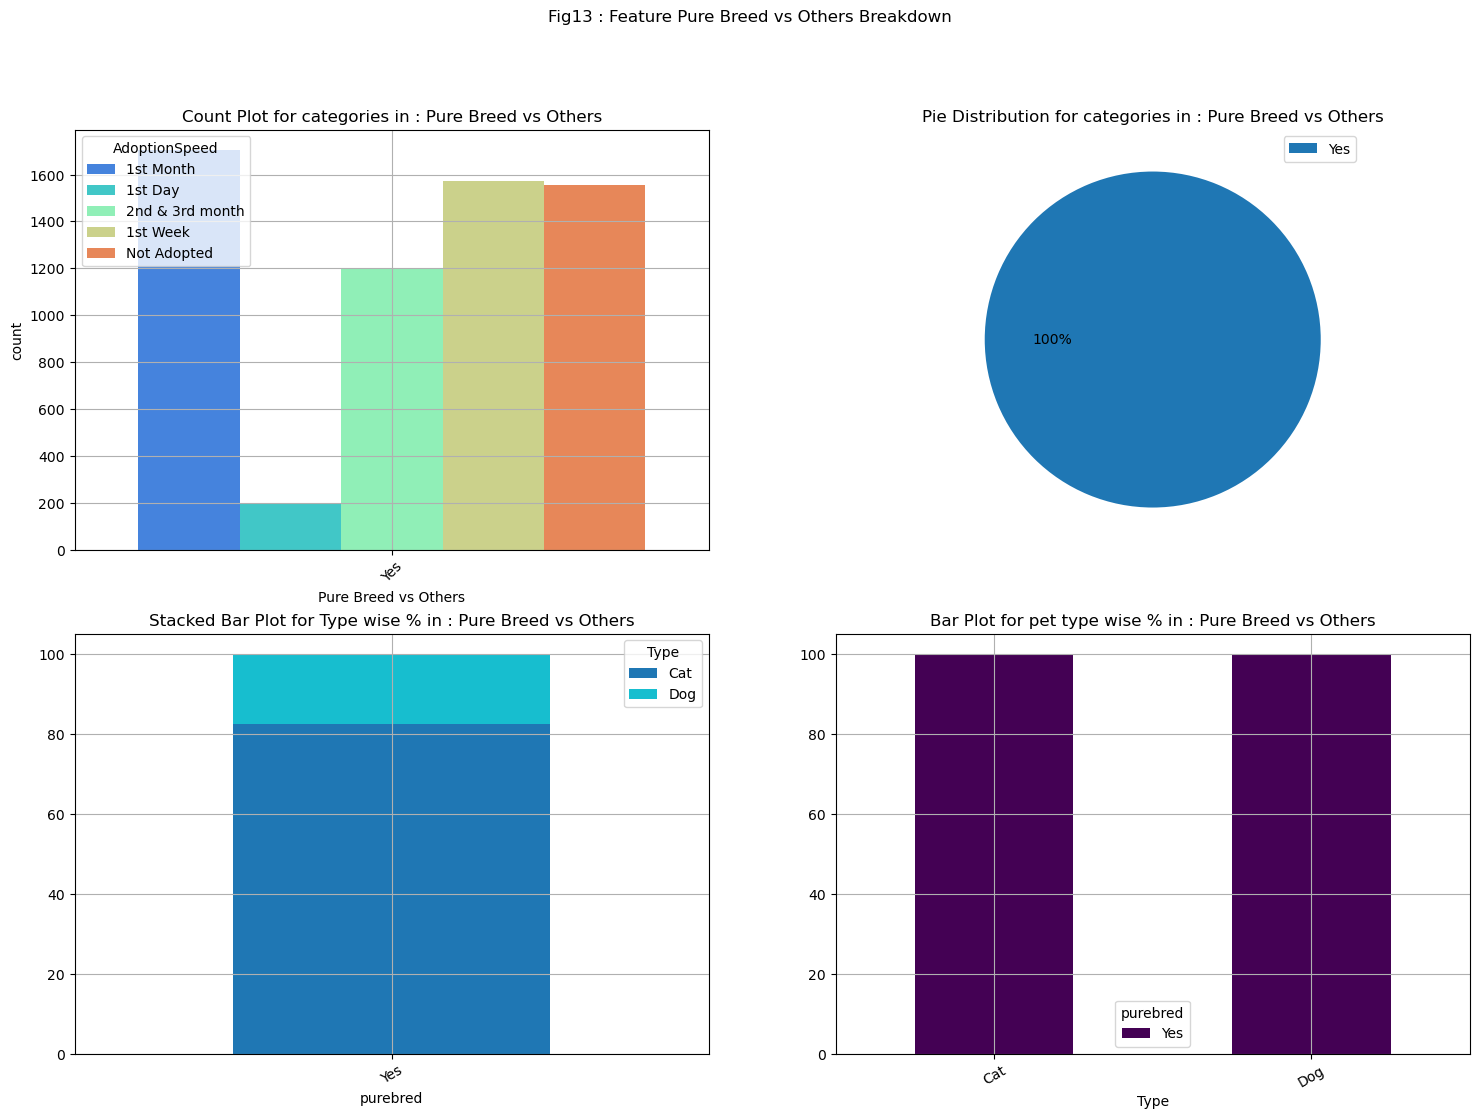

In [57]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['purebred'], 
                                   config.getTypeDict(), config.getYesNoDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.purebred, tempdf.AdoptionSpeed, tempdf.Type, 'Pure Breed vs Others')

#### Observation - TODO
* PureBred are Adopted very well.
* The ratio of purebred is 47% to 53% which are mixed breed
* Dogs are alomost 80% purebred, whereas cats are only 20%

#### Feature SingleColor

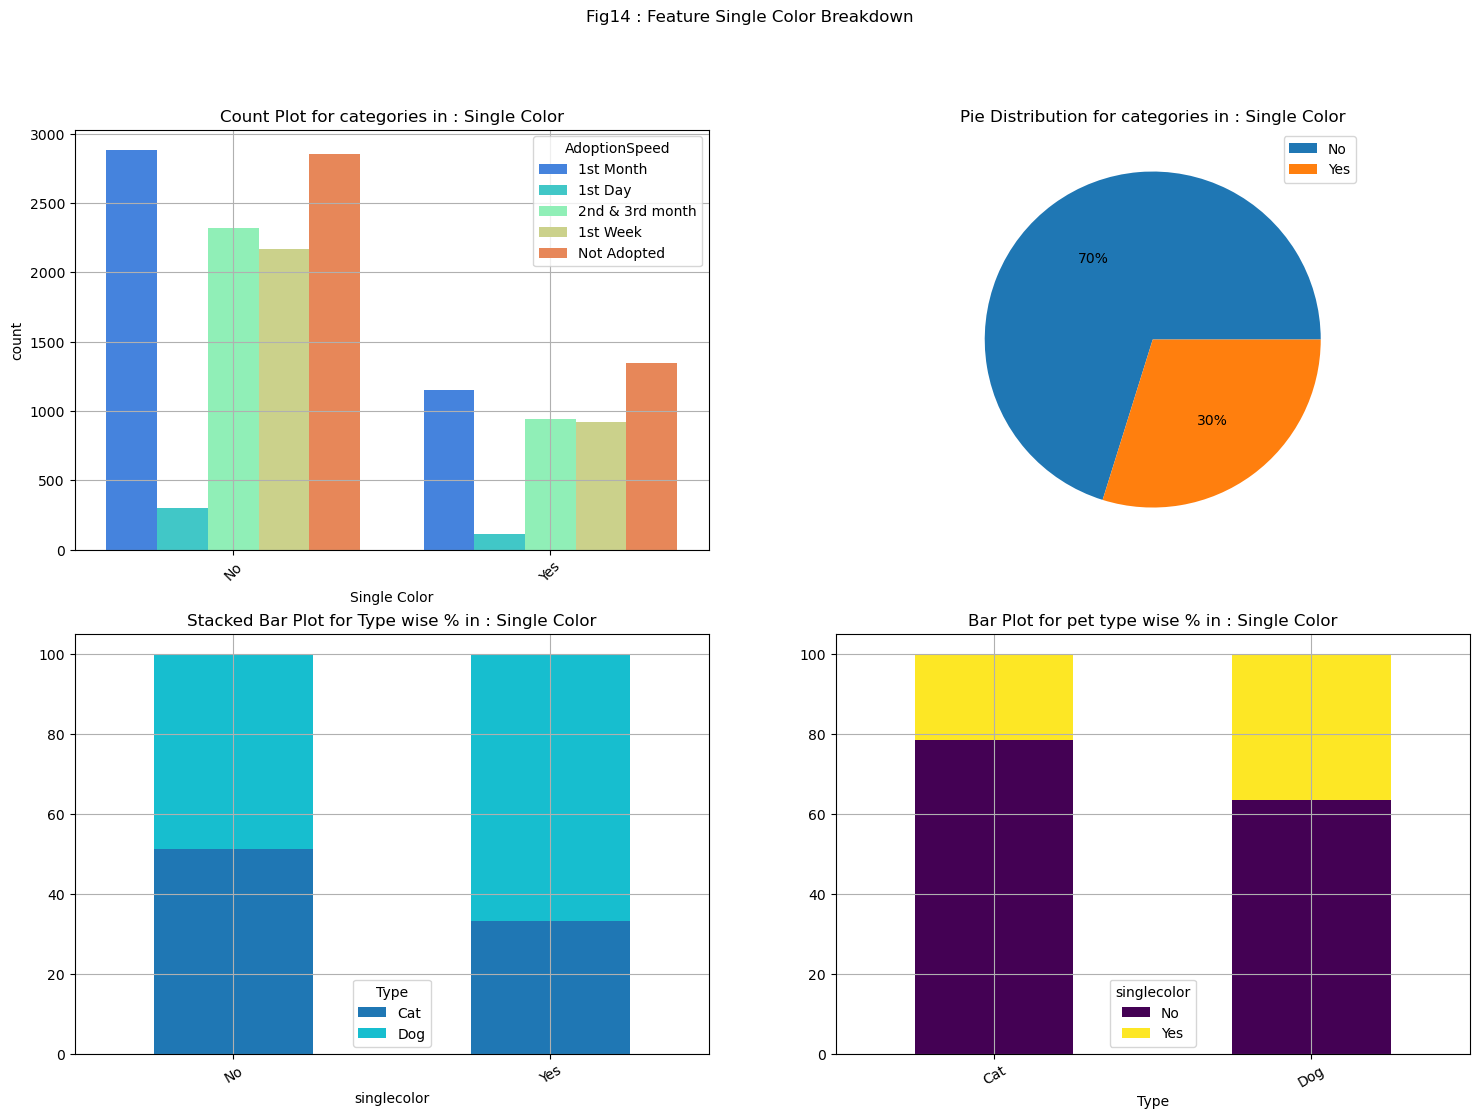

In [60]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['singlecolor'], 
                                   config.getTypeDict(), config.getYesNoDict(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.singlecolor, tempdf.AdoptionSpeed, tempdf.Type, 'Single Color')

#### Observation 
* Adoption Speed don't really care if the pets are single or multicolor
* Split ratio of single to multicolor is 30-70 %
* Single color ratio of Dogs to Cats is about 70-30% 


#### Feature State(For Purebred)

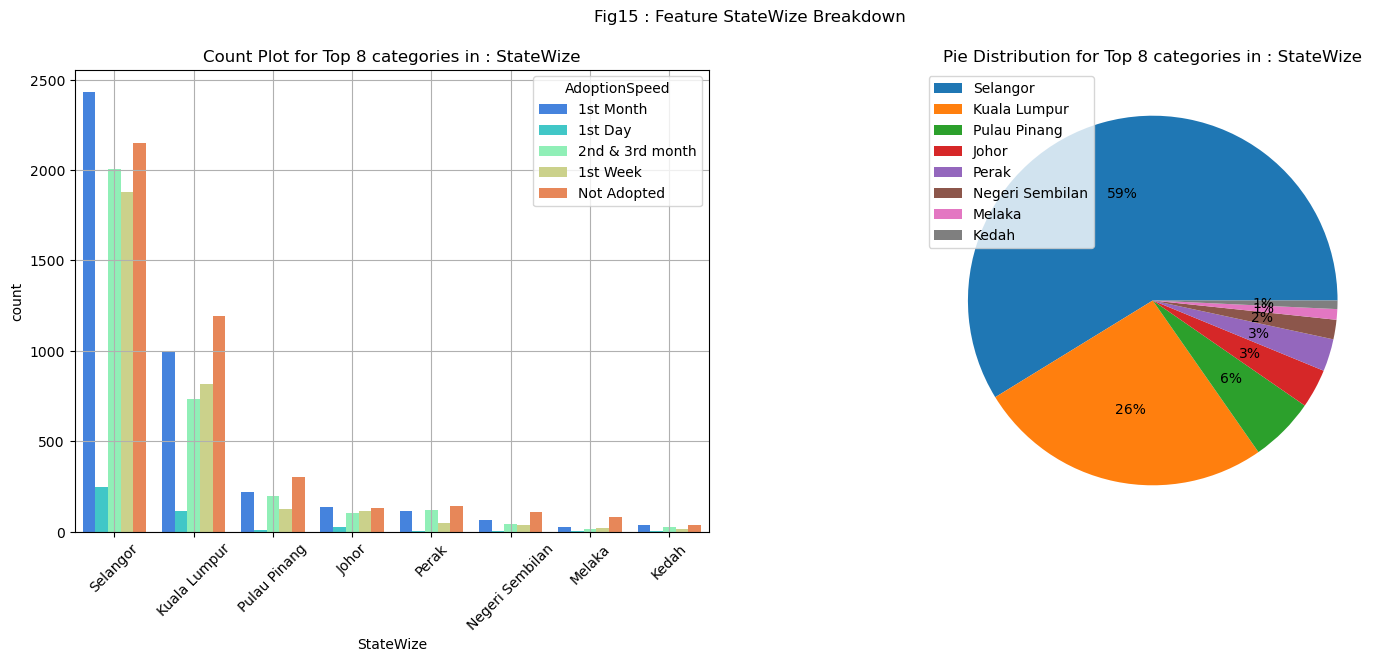

In [63]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['State'], 
                                   config.getTypeDict(), states_df.set_index('StateID').to_dict().get("StateName"),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.State, tempdf.AdoptionSpeed, tempdf.Type, 'StateWize', show_count=8, plot_all=False)


#### Observation 
* Selangor state is the one where most adoptions happen, about 59% of the adoptions
* Followed by Kauala Lumpur 
* 


#### Feature purebred

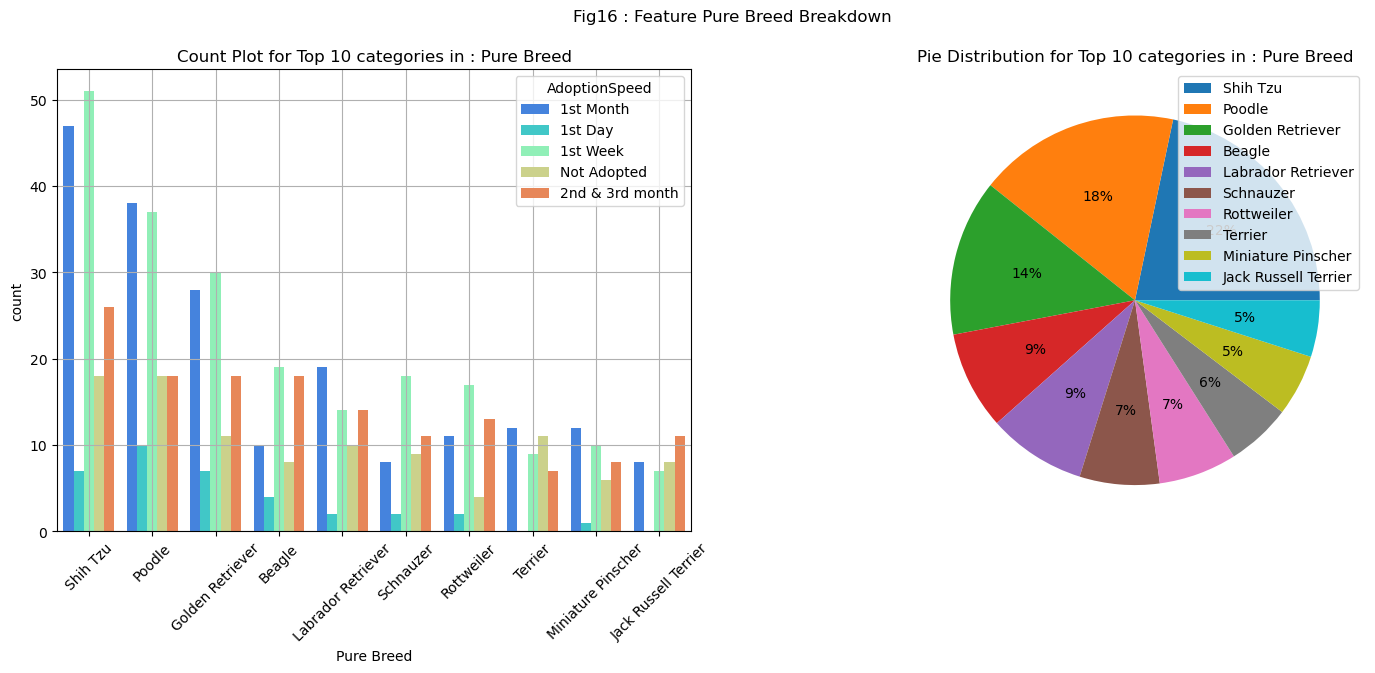

In [66]:
purebred_dog_df = pets_df.query('purebred == 1')

tempdf = cf.map_series_to_category(
        purebred_dog_df['Type'], purebred_dog_df['Breed1'], 
        config.getTypeDict(), 
        breeds_df[breeds_df['Type'] == 1].drop(columns='Type', axis=1).set_index('BreedID').to_dict().get("BreedName"),
        purebred_dog_df['AdoptionSpeed'], config.getAdoptionSpeed())
cf.generate_categorical_plots(tempdf, config, tempdf.Breed1, tempdf.AdoptionSpeed, tempdf.Type, 'Pure Breed', show_count=10, plot_all=False)


#### Observation
* For the purebred Dogs, the top 3 breeds adopted are
    1) Shih Tzu
    2) Poodle
    3) Golden Retriever  


#### Feature VideoAmt
Total uploaded videos for this pet

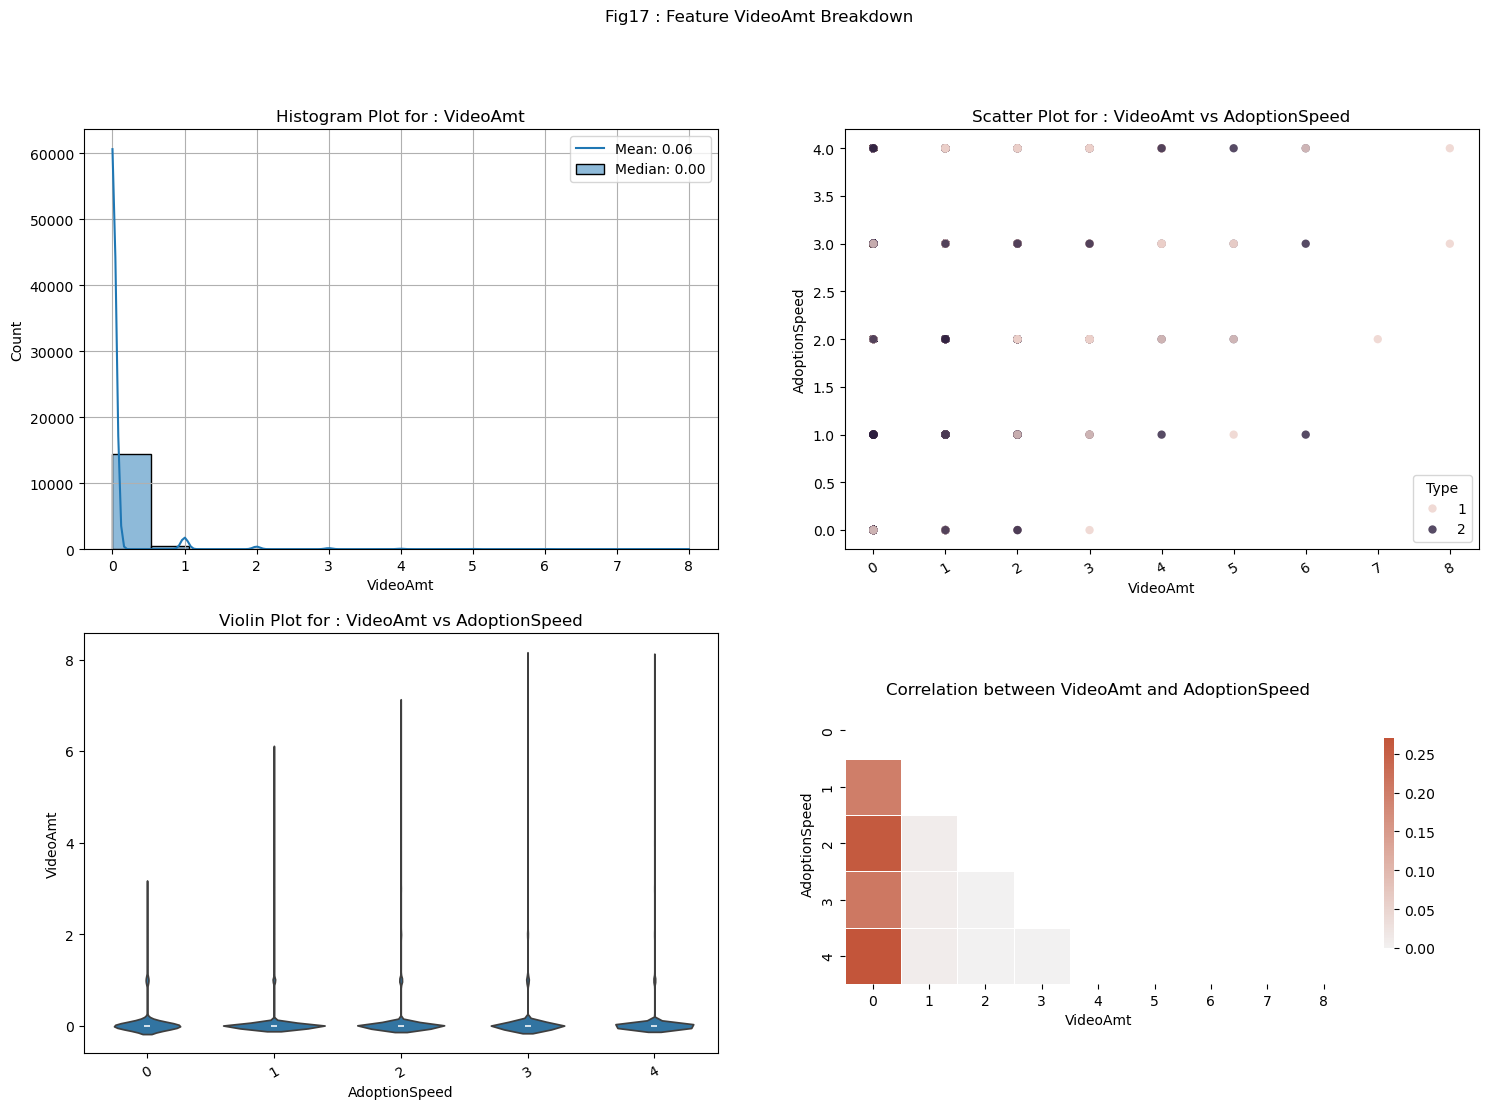

In [69]:
cf.generate_qualitative_plots(pets_df, config, pets_df.VideoAmt, pets_df.AdoptionSpeed, pets_df.Type, 'VideoAmt')

#### Observation
* Mean of Pets video per profile  < 1


#### Feature PhotoAmt

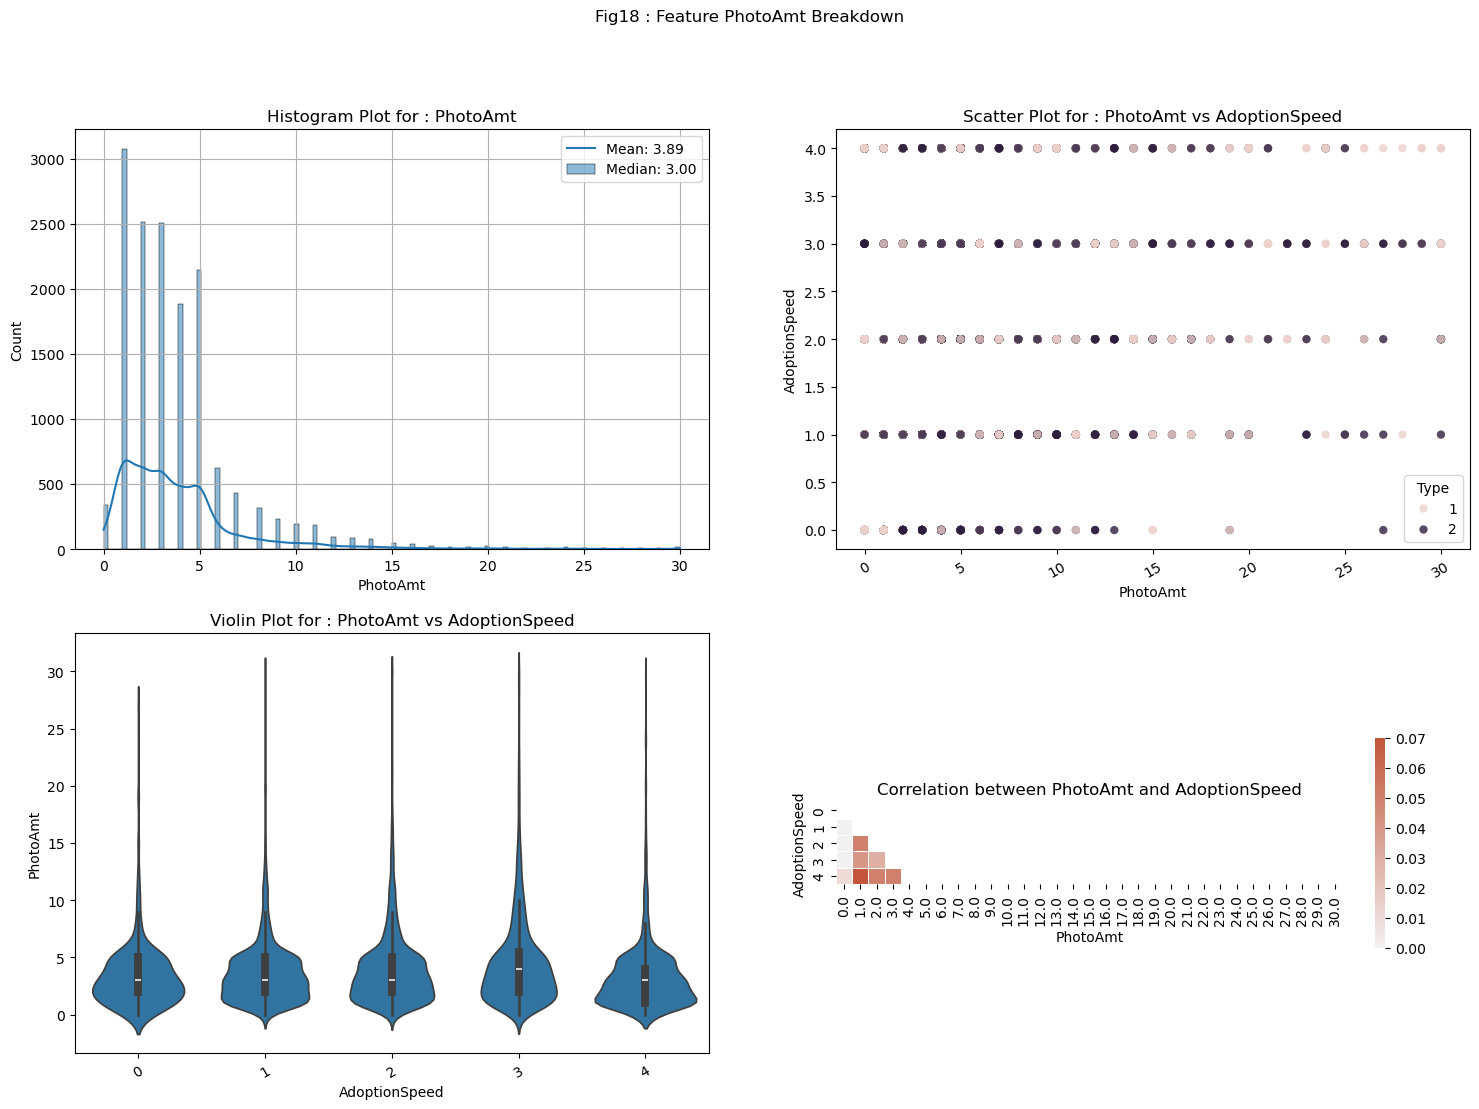

In [72]:
cf.generate_qualitative_plots(pets_df, config, pets_df.PhotoAmt, pets_df.AdoptionSpeed, pets_df.Type, 'PhotoAmt')

#### Observation 
* On a average count of photos per pet is around 3.5
* Pets adopted on 1st day or week does not correlate to picture. Having pictures help in adoption during 1st-3rd Month


#### Feature - Fee

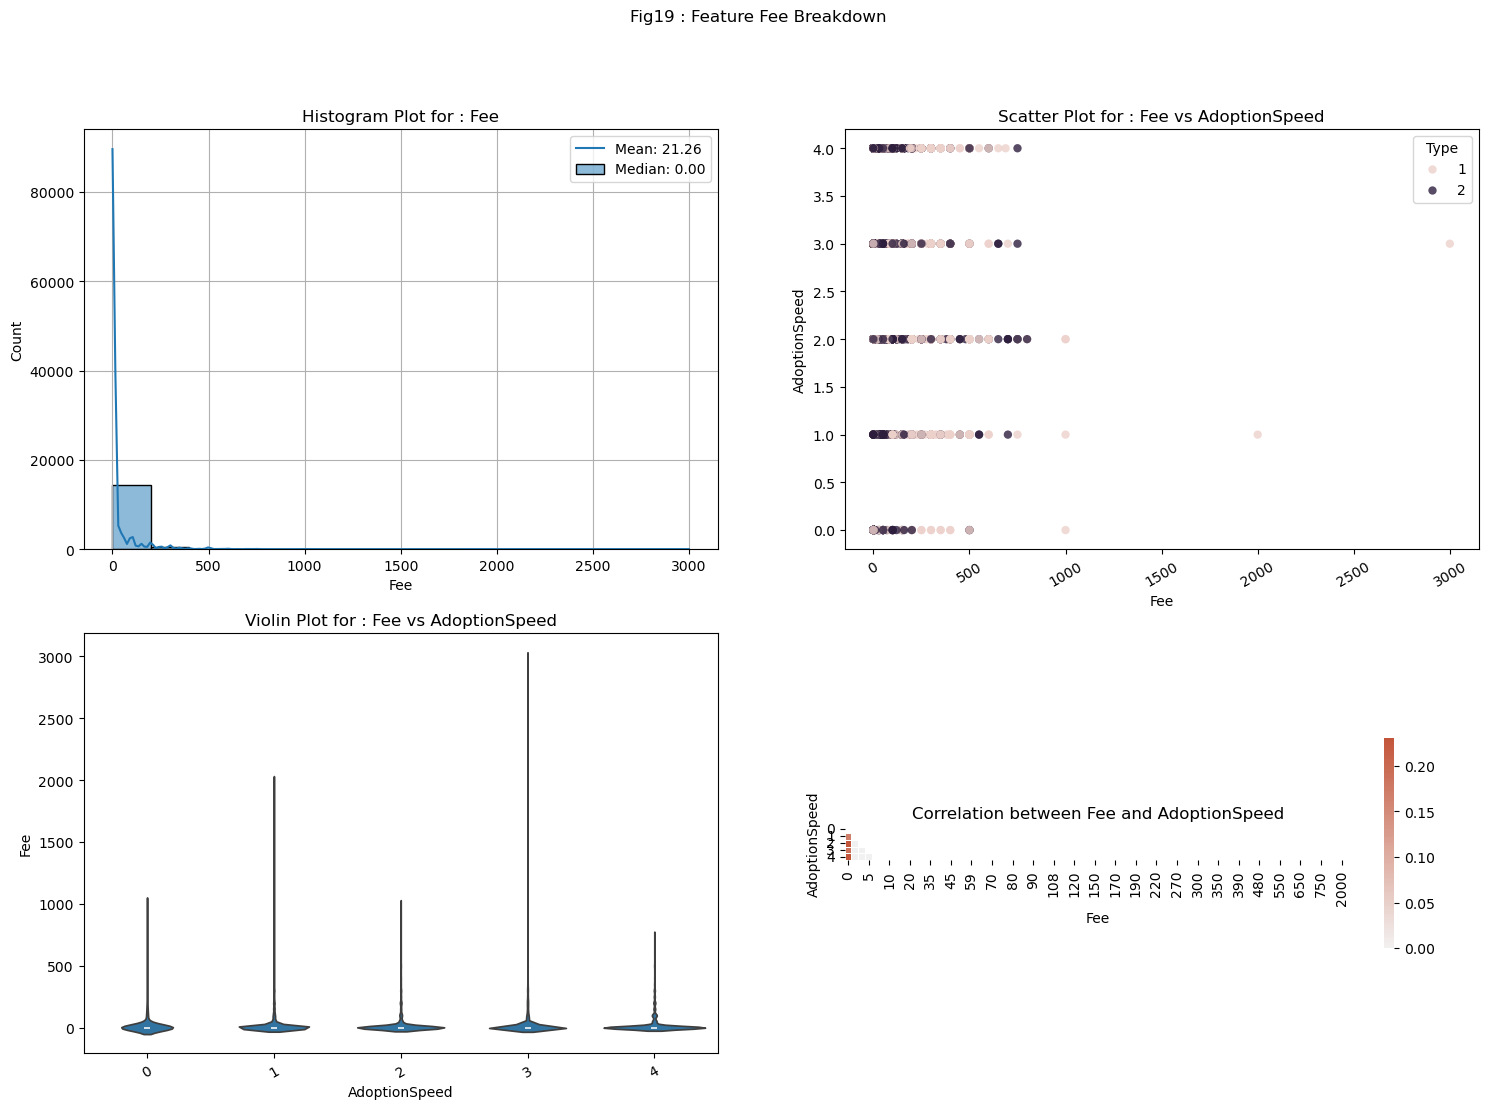

In [75]:
cf.generate_qualitative_plots(pets_df, config, pets_df.Fee, pets_df.AdoptionSpeed, pets_df.Type, 'Fee')

#### Observation
* Most of the fees for Adoption is 0, however it could range from 0 -  3000 mostly.  



#### Feature Quantity

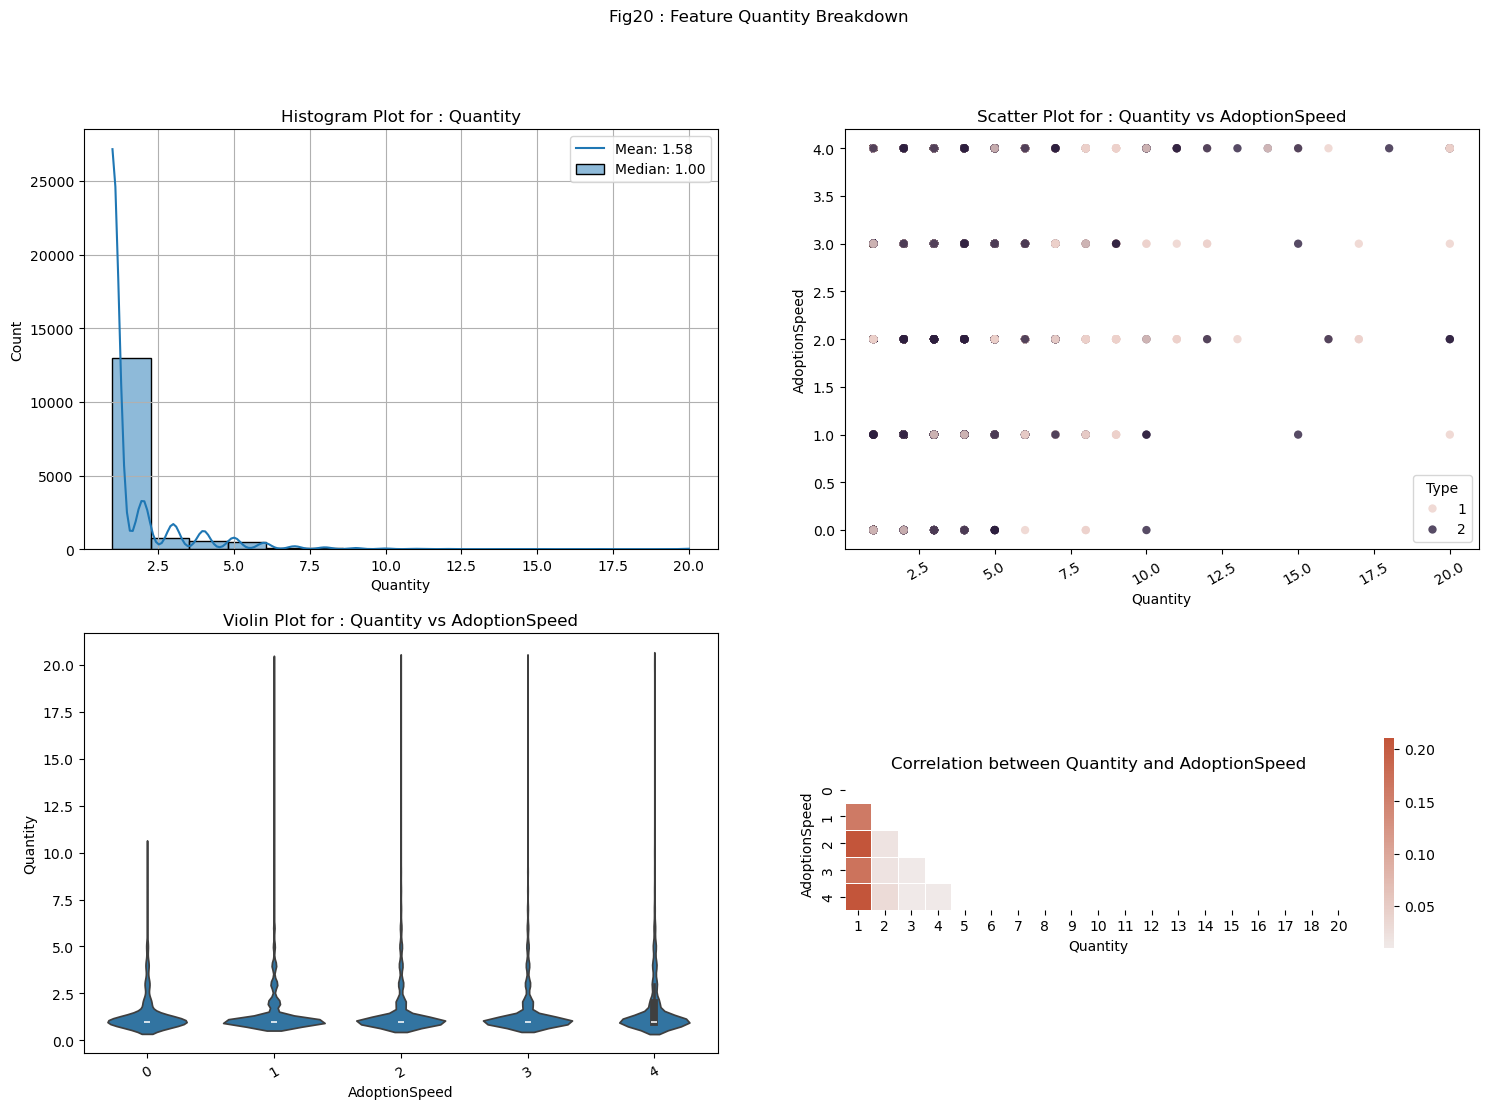

In [78]:
cf.generate_qualitative_plots(pets_df, config, pets_df.Quantity, pets_df.AdoptionSpeed, pets_df.Type, 'Quantity')

#### Observation 
* This feature looks like represents a group of pets.
* Not sure how they are related to Speed of adoption

#### Target Feature
Let's plot and see if it is balanced or not 

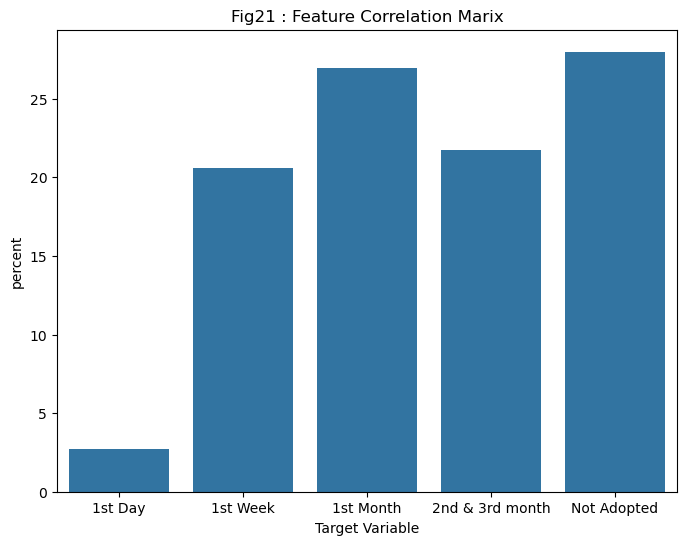

In [81]:
tempdf = cf.map_series_to_category(pets_df['Type'], pets_df['AdoptionSpeed'], 
                                   config.getTypeDict(), config.getAdoptionSpeed(),
                                  pets_df['AdoptionSpeed'], config.getAdoptionSpeed())
fig, axs = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(x=tempdf.AdoptionSpeed, data=tempdf, stat='percent', legend='full', ax=axs, order=config.getAdoptionSpeed().values())
plt.xlabel('Target Variable')
#plt.grid()
title, figcounter = config.getFigTitle(f'Feature Correlation Marix')
plt.title(title)
config.savefig(fig, title) 
plt.show();



In [82]:
# Load the sentiment file
sentiment_df = pd.read_csv('data2/train/sentiment.csv')
pets_df = pd.merge(pets_df, sentiment_df, on='PetID')


In [83]:
# Lets look at the target which is AdoptionSpeed
pets_df['AdoptionSpeed'] .value_counts()

AdoptionSpeed
4    4027
2    3906
3    3176
1    2949
0     384
Name: count, dtype: int64

#### The Target - AdoptionSpeed is a multiclass
* Since target variable is imbalabced, 'accuracy' is not the correct metric for benchmarking, since it become easy to get a high accuracy score by simply classifying all observations as the majority class
* F1-score which is a harmonic mean of Precision and Recall, and gives a combined idea about these two metrics. But it comes with a caveat that interpretability sometimes is a challenge since it hard to determine that classifier is maximized for - precision or recall and even more in case of muilticlass

#### So will chose performance metric as 'f1' and the average will use set to 'micro', so that we can tune for individual class in the AdoptionSpeed
 

In [85]:
config.setScoringMetric('f1')

#### Features Engineering
* For Name we created a new hasName( 1 - for Pet having name, 0 for no Name)
* For Breed1, Breed2 we created a new feature boolean purebred(1 - for purebreeds and ) for Mixed/Cross Breeeds)
* For Color1, Color2, Color3, a new feature singlecoloe is added to represent pet coloe(1 for single color, 0 for multicolor)
* PetID will be unique, so could be dropped
* RescuerID has lot of variance, so we will drop it
* For Description - can be dropped, since we already are using sentiment data generated by Google Sentiment.

In [87]:
#Let's look at current features ...
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442 entries, 0 to 14441
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         14442 non-null  int64  
 1   Name                         13207 non-null  object 
 2   Age                          14442 non-null  int64  
 3   Breed1                       14442 non-null  int64  
 4   Breed2                       14442 non-null  int64  
 5   Gender                       14442 non-null  int64  
 6   Color1                       14442 non-null  int64  
 7   Color2                       14442 non-null  int64  
 8   Color3                       14442 non-null  int64  
 9   MaturitySize                 14442 non-null  int64  
 10  FurLength                    14442 non-null  int64  
 11  Vaccinated                   14442 non-null  int64  
 12  Dewormed                     14442 non-null  int64  
 13  Sterilized      

In [88]:
# We are going to remove features breed and color, since we have featured them already
cols_to_drop = ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Name', 'PetID', 'RescuerID', 'Description']

cleaned_pets_df = pets_df.drop(columns=cols_to_drop, axis=1)
cleaned_pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442 entries, 0 to 14441
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         14442 non-null  int64  
 1   Age                          14442 non-null  int64  
 2   Gender                       14442 non-null  int64  
 3   MaturitySize                 14442 non-null  int64  
 4   FurLength                    14442 non-null  int64  
 5   Vaccinated                   14442 non-null  int64  
 6   Dewormed                     14442 non-null  int64  
 7   Sterilized                   14442 non-null  int64  
 8   Health                       14442 non-null  int64  
 9   Quantity                     14442 non-null  int64  
 10  Fee                          14442 non-null  int64  
 11  State                        14442 non-null  int64  
 12  VideoAmt                     14442 non-null  int64  
 13  PhotoAmt        

In [89]:
pets_test_df.drop(columns=cols_to_drop, axis=1, inplace=True)

#### We are down to 20 features with one object feature. Let's do a correlation map for more feature selection

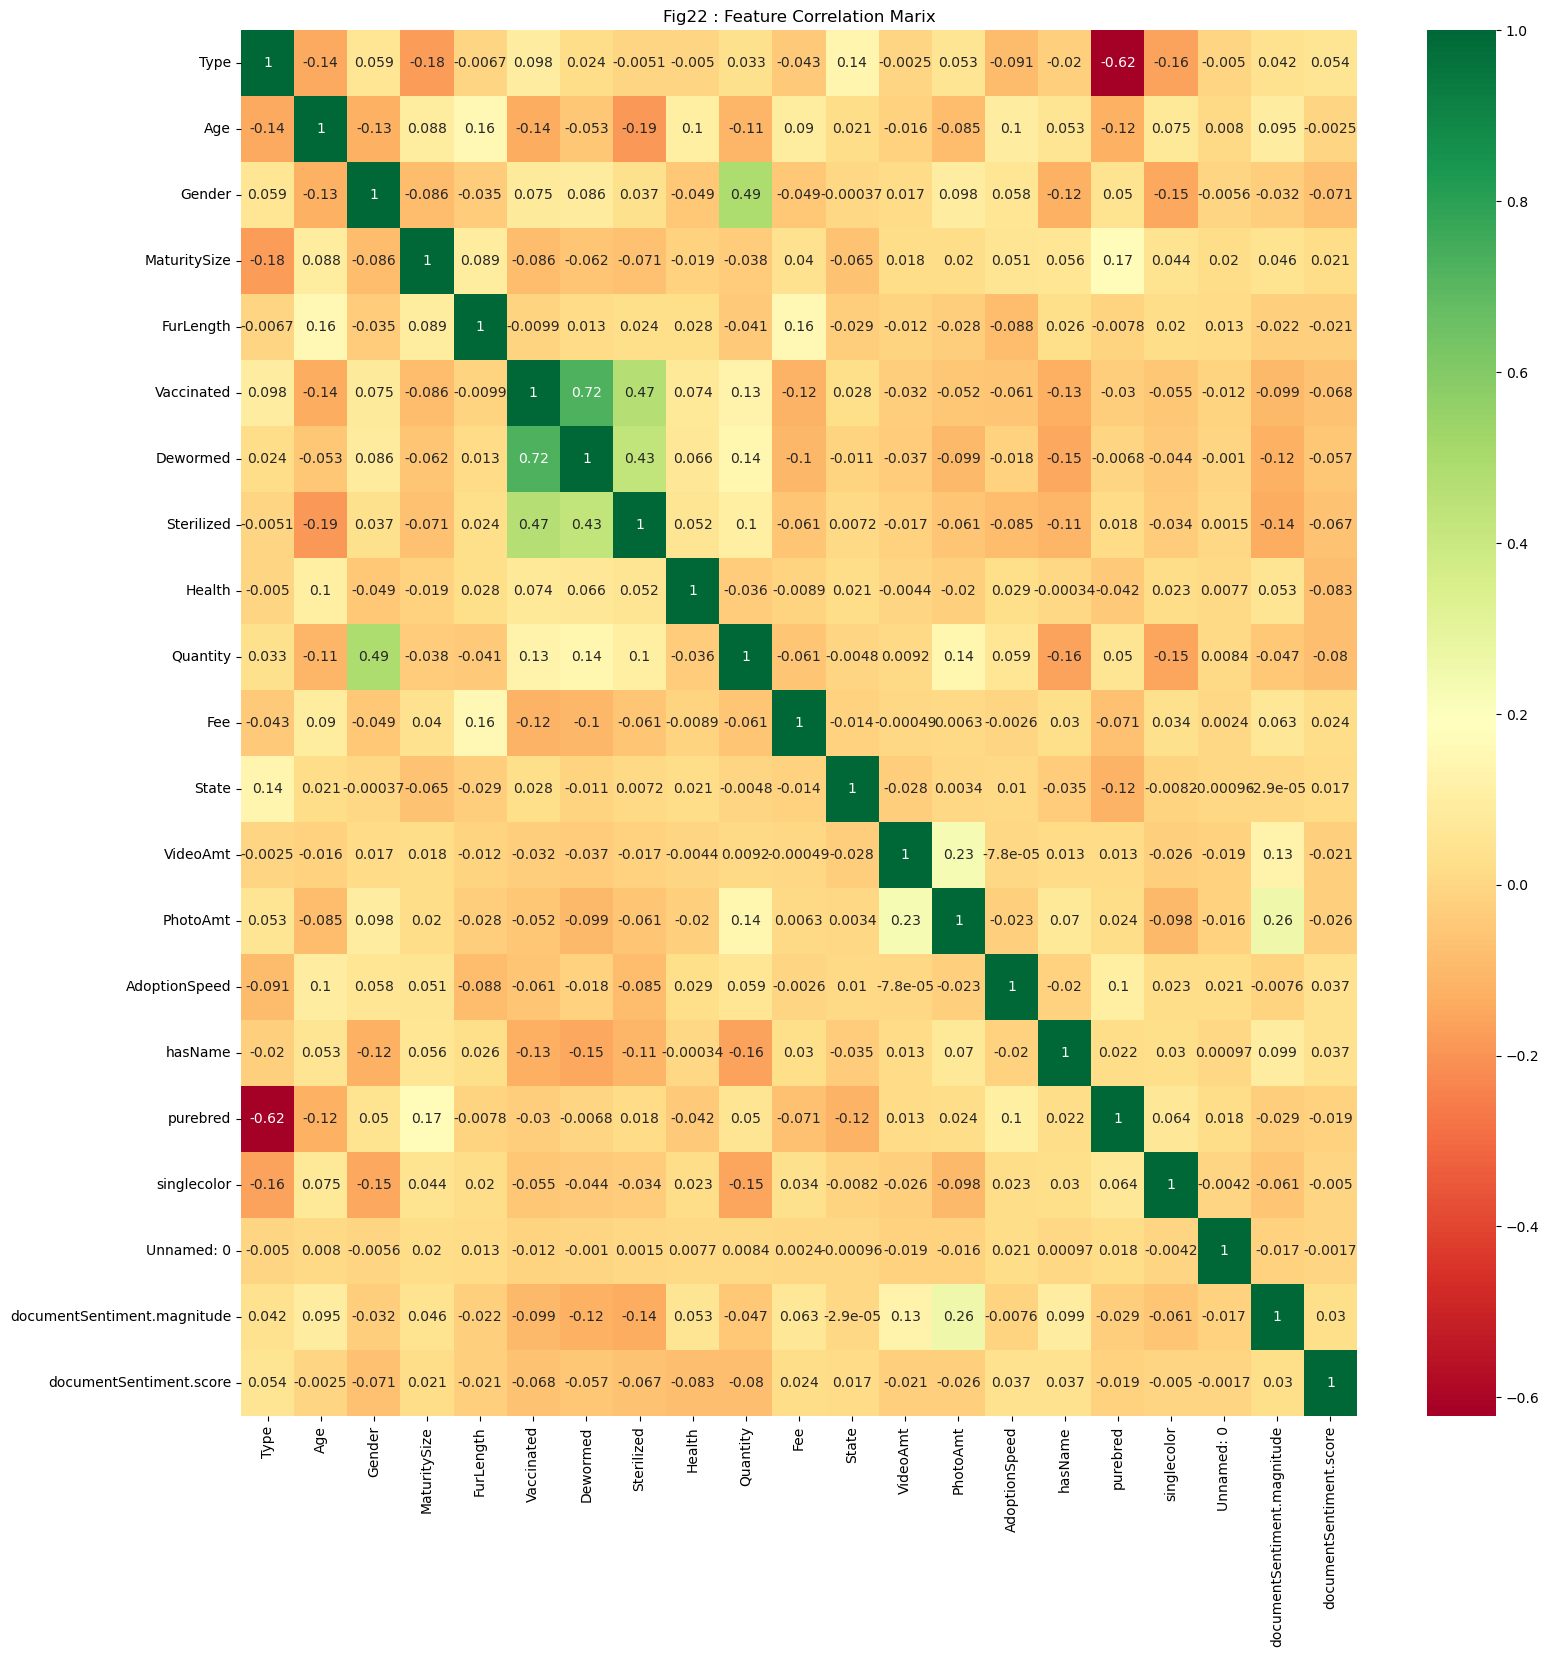

In [91]:
fig, axs = plt.subplots(1, 1, figsize=(18,18))
corr_data = cleaned_pets_df.corr()
sns.heatmap(corr_data, annot=True, cmap='RdYlGn', ax=axs)
title, figcounter = config.getFigTitle(f'Feature Correlation Marix')
axs.set_title(title)
config.savefig(fig, title) 
fig.show();



#### Observations - Possible feature selections
* Vaccinated has strong correlation(0.72) to Dewormed
* Dewormed and Vaccinated have similar correlation to Health
* Dewormed and Vaccinated have similar correlation to Sterlized
* Type has strong correlation to purebred
* Quantity has +ve correlation ot Gender
* So we chose to
    * keep  - Vaccinated, Quantity, Type
    * drop  - Dewormed, Type, Gender, maybe Health
